In [1]:
require(readstata13)
require(foreign)
require(multiwayvcov)
require(mlogit)
require(xtable)
require(stargazer)
require(ggplot2)
require(car)
require(mgcv)
require(reshape2)
require(nnet)
library('Matching')

#Load in replication data from B&W
county.data <- read.dta13("BW JOP county replication data.dta")
indiv.data <- read.dta("BW JOP individual replication data.dta")
state.data <- read.dta("BW JOP state replication data.dta")

Loading required package: readstata13
Loading required package: foreign
Loading required package: multiwayvcov
Loading required package: mlogit
Loading required package: Formula
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: lmtest
Loading required package: xtable
Loading required package: stargazer

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: ggplot2
Loading required package: car
Loading required package: carData
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-27. For overview type 'help("mgcv-package")'.
Loading required package: reshape2
Loading required package: nnet

Attaching package: ‘nnet’

The following object is masked from ‘package:mgcv’:

    multinom

Loading req

In [ ]:
#REPLICATION

#TABLE 1

#Table 1 Model 1 (Unweighted) - correct coefficients and standard errors (except intercept)

table1.model1 <- lm(Turnout ~ Unemploy_County_new + Unemploy_State + PcntBlack + ZPcntHSGrad +
                      AdjIncome + closeness + GubElection + SenElection +
                      Yr2008 + Yr2004 + Yr2000 + Yr96 + Yr92 + Yr88 + Yr84 + Yr80 +  
                      factor(FIPS_County), data=county.data)
table1.model1$coefficients[1:9]

#SE
m1.vcovCL <- cluster.vcov(table1.model1, county.data$FIPS_County, df_correction = FALSE)
ses.m1u <- sqrt(diag(m1.vcovCL))
ses.m1u[1:13]

#Table 1 Model 1 (Weighted) - correct coefficients and standard errors (except intercept)

table1.model1w <- lm(Turnout ~ Unemploy_County_new + Unemploy_State + PcntBlack + ZPcntHSGrad +
                       AdjIncome + closeness + GubElection + SenElection +
                       Yr2008 + Yr2004 + Yr2000 + Yr96 + Yr92 + Yr88 + Yr84 + Yr80 +  
                       factor(FIPS_County), data=county.data, weights=as.numeric(pop))
table1.model1w$coefficients[1:9]

#SE
m1w.vcovCL <- cluster.vcov(table1.model1w, county.data$FIPS_County, df_correction = TRUE)
ses.m1w <- sqrt(diag(m1w.vcovCL))
ses.m1w[1:9]
library("Matching")
GenMatch?

#Table 1 Model 2 (Unweighted) - correct coefficients and standard errors (except intercept)

table1.model2u <- lm(Turnout ~ Unemploy_County_new + Unemploy_State + PcntBlack + ZPcntHSGrad +
                       AdjIncome + closeness + GubElection + SenElection + Turnout_Lag +
                       Yr2008 + Yr2004 + Yr2000 + Yr96 + Yr92 + Yr88 + Yr84 + Yr80 +  
                       factor(FIPS_County), data=county.data)
table1.model2u$coefficients[1:10]

#SE
m2u.vcovCL <- cluster.vcov(table1.model2u, county.data$FIPS_County, df_correction = FALSE)
ses.m2u <- sqrt(diag(m2u.vcovCL))
ses.m2u[1:10]

#Table 1 Model 2 (Weighted) - correct coefficients and standard errors (except intercept)

table1.model2w <- lm(Turnout ~ Unemploy_County_new + Unemploy_State + PcntBlack + ZPcntHSGrad +
                       AdjIncome + closeness + GubElection + SenElection + Turnout_Lag +
                       Yr2008 + Yr2004 + Yr2000 + Yr96 + Yr92 + Yr88 + Yr84 + Yr80 +  
                       factor(FIPS_County), data=county.data, weights=as.numeric(pop))
table1.model2w$coefficients[1:10]

#SE
m2w.vcovCL <- cluster.vcov(table1.model2w, county.data$FIPS_County, df_correction = TRUE)
ses.m2w <- sqrt(diag(m2w.vcovCL))
ses.m2w[1:10]

#########################################################################################################

(Intercept) Unemploy_County_new      Unemploy_State           PcntBlack 
       53.767916410         0.131096937         0.524431591         0.031756534 
        ZPcntHSGrad           AdjIncome           closeness         GubElection 
        1.509449394        -0.416079141         0.009969979         5.328460026 
        SenElection 
        0.635969362

(Intercept) Unemploy_County_new      Unemploy_State           PcntBlack 
         1.37848210          0.02802260          0.03954852          0.03964061 
        ZPcntHSGrad           AdjIncome           closeness         GubElection 
         0.22194945          0.36971850          0.00254290          0.35290618 
        SenElection              Yr2008              Yr2004              Yr2000 
         0.04698890          0.37893043          0.27636782          0.24916825 
               Yr96 
         0.19907555

In [ ]:
#########################################################################################################
#TABLE 2- Diff in Diff model of county turnout

#Model 1

t2model1 <- lm(Turnout_diff4 ~ Unemploy_County_diff4 + Unemploy_State_diff4 + Yr2008
               + Yr2004 + Yr2000 + Yr96 + Yr88 + Yr84 + Yr80 + Yr76 + factor(FIPS_County), data = county.data)
t2model1$coefficients[1:3]

#SE

t2m1.vcovCL <- cluster.vcov(t2model1, county.data$FIPS_County, df_correction = FALSE)
ses.t2m1 <- sqrt(diag(t2m1.vcovCL))
ses.t2m1[1:3]

#Intercept p-value

#Test Statistic
t_stat.t2m1 <- (4.09143865 - 0)/0.07437852 # 55.00834
t_stat.t2m1

#p-value
pvalue.t2m1 <- 2*(1 - pnorm(abs(t_stat.t2m1), 0, 1)) # 0
pvalue.t2m1

#Model 2

t2model2 <- lm(Turnout_diff4 ~ Unemploy_County_diff4 + Unemploy_State_diff4 + PcntBlack + ZPcntHSGrad + AdjIncome
               + closeness + GubElection + SenElection + Yr2008 + Yr2004 + Yr2000 + Yr96 + Yr88 + Yr84 + Yr80 + Yr76 
               + factor(FIPS_County), data = county.data)
t2model2$coefficients[1:25]

t2m2.vcovCL <- cluster.vcov(t2model2, county.data$FIPS_County, df_correction = FALSE)
ses.t2m2 <- sqrt(diag(t2m2.vcovCL))
ses.t2m2[1:13]

#Intercept Test Statistic
t_stat.t2m2 <- (2.485957452 - 0)/0.775492363 # 3.20565
t_stat.t2m2

#Intercept p-value
pvalue.t2m2 <- 2*(1 - pnorm(abs(t_stat.t2m2), 0, 1)) # 0.0013
pvalue.t2m2


In [2]:
###############################################################################################  
#TABLE 4

state.data.t4 <- state.data[ which(state.data$presyear==0 
                                   & state.data$year >= '1980'
                                   & state.data$GubElection == 1), ]

#The regression they ran, without year fixed effects
table4.1 <- lm(vep ~ uerate + incparty + uerate*incparty + s_black + college + SenElection
               + factor(fips_state), data=state.data.t4)
summary(table4.1)

t41.vcovCL <- cluster.vcov(table4.1, state.data.t4$fips_state, df_correction = TRUE)
ses.t41 <- sqrt(diag(t41.vcovCL))
ses.t41


Call:
lm(formula = vep ~ uerate + incparty + uerate * incparty + s_black + 
    college + SenElection + factor(fips_state), data = state.data.t4)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121557 -0.018952 -0.000036  0.018290  0.092344 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.105935   0.082429   1.285 0.199957    
uerate                0.057951   0.159455   0.363 0.716600    
incpartyR            -0.043711   0.012992  -3.364 0.000891 ***
s_black               1.112003   0.346261   3.211 0.001499 ** 
college               0.043146   0.054991   0.785 0.433451    
SenElection           0.013849   0.004497   3.080 0.002311 ** 
factor(fips_state)2   0.367554   0.080955   4.540 8.85e-06 ***
factor(fips_state)4   0.215977   0.081569   2.648 0.008632 ** 
factor(fips_state)5   0.107105   0.037167   2.882 0.004309 ** 
factor(fips_state)6   0.221354   0.069422   3.189 0.001618 ** 
factor(fips_state)8   0.281948 

(Intercept)               uerate            incpartyR 
         0.127569921          0.126643254          0.012649821 
             s_black              college          SenElection 
         0.548112123          0.084032915          0.004959583 
 factor(fips_state)2  factor(fips_state)4  factor(fips_state)5 
         0.125423366          0.126498235          0.051969096 
 factor(fips_state)6  factor(fips_state)8  factor(fips_state)9 
         0.106952278          0.127158003          0.102126204 
factor(fips_state)12 factor(fips_state)13 factor(fips_state)15 
         0.065016951          0.010658044          0.133459601 
factor(fips_state)16 factor(fips_state)17 factor(fips_state)19 
         0.139998459          0.064567449          0.131885918 
factor(fips_state)20 factor(fips_state)23 factor(fips_state)24 
         0.113507177          0.138510797          0.010344210 
factor(fips_state)25 factor(fips_state)26 factor(fips_state)27 
         0.121511929          0.068715719          0.131674279 
factor(fips_state)31 factor(fips_state)32 factor(fips_state)33 
         0.122364958          0.104189689          0.141426927 
factor(fips_state)35 factor(fips_state)36 factor(fips_state)39 
         0.132907106          0.062794773          0.083525037 
factor(fips_state)40 factor(fips_state)41 factor(fips_state)42 
         0.101841027          0.135996071          0.090522512 
factor(fips_state)44 factor(fips_state)45 factor(fips_state)46 
         0.123400667          0.021250518          0.139107425 
factor(fips_state)47 factor(fips_state)48 factor(fips_state)50 
         0.052931384          0.078770489          0.142010906 
factor(fips_state)55 factor(fips_state)56     uerate:incpartyR 
         0.116257315          0.137160535          0.191266806


Call:
lm(formula = vep ~ uerate + incparty + uerate * incparty + s_black + 
    college + SenElection + factor(fips_state) + factor(year), 
    data = state.data.t4)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121760 -0.017739 -0.001529  0.015975  0.094655 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.824e-02  8.238e-02   0.464 0.642911    
uerate                4.475e-01  2.185e-01   2.048 0.041665 *  
incpartyR            -3.815e-02  1.249e-02  -3.055 0.002513 ** 
s_black               1.217e+00  3.318e-01   3.668 0.000302 ***
college               1.756e-01  1.249e-01   1.406 0.161145    
SenElection           1.553e-02  4.295e-03   3.617 0.000365 ***
factor(fips_state)2   3.792e-01  7.754e-02   4.890 1.86e-06 ***
factor(fips_state)4   2.354e-01  7.816e-02   3.012 0.002876 ** 
factor(fips_state)5   1.219e-01  3.577e-02   3.408 0.000769 ***
factor(fips_state)6   2.279e-01  6.686e-02   3.409 0.000768 ***


[1] 289

(Intercept)               uerate            incpartyR 
         0.132696124          0.209089720          0.012427452 
             s_black              college          SenElection 
         0.558153708          0.124345916          0.003642366 
 factor(fips_state)2  factor(fips_state)4  factor(fips_state)5 
         0.127792457          0.129164801          0.053148649 
 factor(fips_state)6  factor(fips_state)8  factor(fips_state)9 
         0.109400785          0.130181124          0.105339705 
factor(fips_state)12 factor(fips_state)13 factor(fips_state)15 
         0.066386673          0.011635540          0.136707024 
factor(fips_state)16 factor(fips_state)17 factor(fips_state)19 
         0.142762921          0.066376915          0.134944473 
factor(fips_state)20 factor(fips_state)23 factor(fips_state)24 
         0.116224634          0.141474833          0.016175683 
factor(fips_state)25 factor(fips_state)26 factor(fips_state)27 
         0.124647700          0.069865110          0.135062852 
factor(fips_state)31 factor(fips_state)32 factor(fips_state)33 
         0.125654959          0.106500760          0.144871884 
factor(fips_state)35 factor(fips_state)36 factor(fips_state)39 
         0.135419848          0.064558514          0.085272400 
factor(fips_state)40 factor(fips_state)41 factor(fips_state)42 
         0.103931784          0.138553849          0.092529492 
factor(fips_state)44 factor(fips_state)45 factor(fips_state)46 
         0.126135443          0.021532338          0.142450132 
factor(fips_state)47 factor(fips_state)48 factor(fips_state)50 
         0.054203767          0.080702958          0.145551323 
factor(fips_state)55 factor(fips_state)56     factor(year)1986 
         0.118891275          0.140020981          0.009750782 
    factor(year)1990     factor(year)1994     factor(year)1998 
         0.010996794          0.013148698          0.015863371 
    factor(year)2002     factor(year)2006     factor(year)2010 
         0.016338174          0.017772698          0.013907307 
    uerate:incpartyR 
         0.193787404


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Mon, Apr 22, 2019 - 19:28:44
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{2}{c}{\textit{Dependent variable:}} \\ 
\cline{2-3} 
\\[-1.8ex] & \multicolumn{2}{c}{vep} \\ 
\\[-1.8ex] & (1) & (2)\\ 
\hline \\[-1.8ex] 
 uerate & 0.058 & 0.447$^{**}$ \\ 
  & (0.127) & (0.209) \\ 
  & & \\ 
 incpartyR & $-$0.044$^{***}$ & $-$0.038$^{***}$ \\ 
  & (0.013) & (0.012) \\ 
  & & \\ 
 s\_black & 1.112$^{**}$ & 1.217$^{**}$ \\ 
  & (0.548) & (0.558) \\ 
  & & \\ 
 college & 0.043 & 0.176 \\ 
  & (0.084) & (0.124) \\ 
  & & \\ 
 SenElection & 0.014$^{***}$ & 0.016$^{***}$ \\ 
  & (0.005) & (0.004) \\ 
  & & \\ 
 factor(fips\_state)2 & 0.368$^{***}$ & 0.379$^{***}$ \\ 
  & (0.125) & (0.128) \\ 
  & & \\ 
 factor(fips\_state)4 & 0.216$^{*}$ & 0.235$^{*}$ \\ 
  & (0.126) & 

Warning message in if (varcov == "default") {:
“the condition has length > 1 and only the first element will be used”Warning message in if (varcov == "default") {:
“the condition has length > 1 and only the first element will be used”

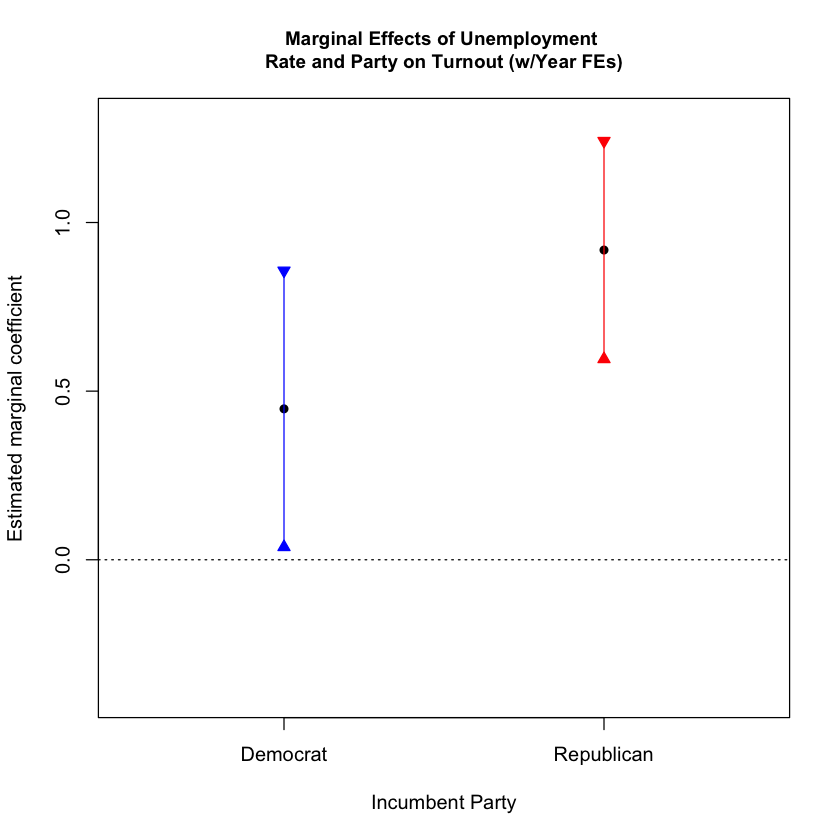

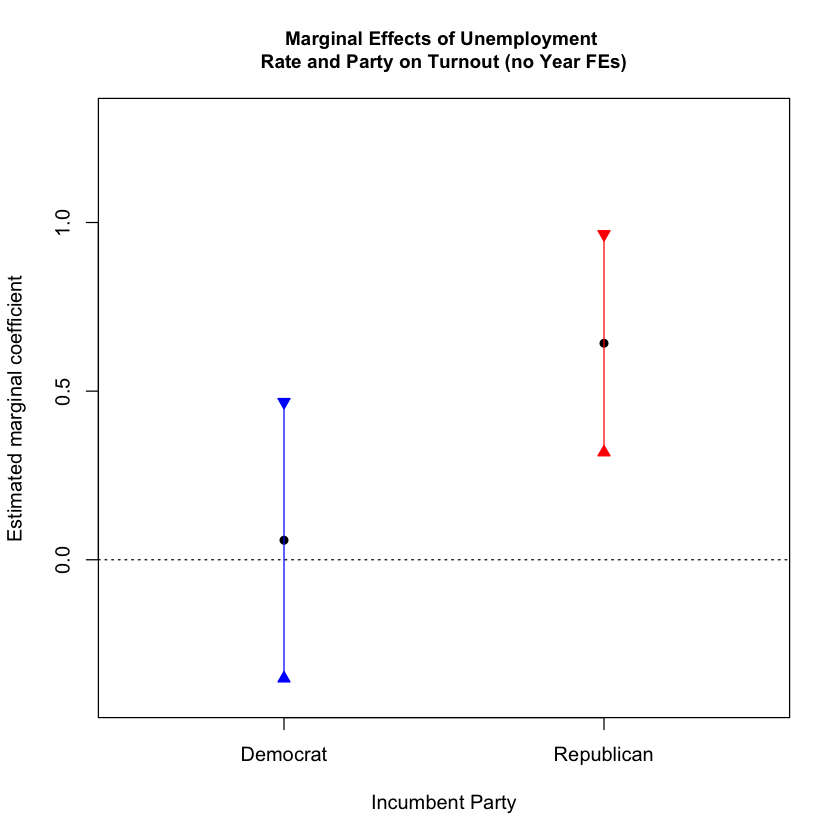

In [3]:
#########################################################################################


#########################################################################################################
#########################################################################################################
#########################################################################################################
#########################################################################################################

#EXTENSIONS

#TABLE 4 (need to run Table 4 replication section that to run this section)

#Re-calculate Table 4 regression with year fixed effects
table4 <- lm(vep ~ uerate + incparty + uerate*incparty + s_black + college + SenElection
             + factor(fips_state) + factor(year), data=state.data.t4)
summary(table4)
nrow(state.data.t4) #289 observations - 4 in regression = 285 total obs (matches Stata)
coefs.t4 <- table4$coefficients

#SE
t4.vcovCL <- cluster.vcov(table4, state.data.t4$fips_state, df_correction = TRUE)
ses.t4 <- sqrt(diag(t4.vcovCL))
ses.t4

stargazer(table4.1, table4,  se=list(ses.t41, ses.t4), notes = c("Ordinary least squares models.", "Standard errors clustered by county."))

#Interaction plot (from Anton's code - http://causalloop.blogspot.com/2013/06/marginal-effect-plots-for-interaction.html)

interaction_plot_binary <- function(model, effect, moderator, interaction, varcov="default", conf=.95, title="Marginal effects plot", xlabel="Value of moderator", ylabel="Estimated marginal coefficient", factor_labels=c(0,1)){
  
  # Extract Variance Covariance matrix
  if (varcov == "default"){
    covMat = vcov(model)
  }else{
    covMat = varcov
  }
  
  # Extract the data frame of the model
  mod_frame = model.frame(model)
  
  # Get coefficients of variables
  beta_1 = model$coefficients[[effect]]
  beta_3 = model$coefficients[[interaction]]
  
  # Create list of moderator values at which marginal effect is evaluated
  x_2 <- c(0,1)
  
  # Compute marginal effects
  delta_1 = beta_1 + beta_3*x_2
  
  # Compute variances
  var_1 = covMat[effect,effect] + (x_2^2)*covMat[interaction, interaction] + 2*x_2*covMat[effect, interaction]
  
  # Standard errors
  se_1 = sqrt(var_1)
  
  # Upper and lower confidence bounds
  z_score = qnorm(1 - ((1 - conf)/2))
  upper_bound = delta_1 + z_score*se_1
  lower_bound = delta_1 - z_score*se_1
  
  # Determine the bounds of the graphing area
  max_y = 1.3
  min_y = -0.4
  
  # Initialize plotting window
  plot(x=c(), y=c(), ylim=c(min_y, max_y), xlim=c(-.5, 1.5), xlab=xlabel, ylab=ylabel, main=title, cex.main=.95,  xaxt="n")
  
  # Plot points of estimated effects
  points(x=x_2, y=delta_1, pch=16)
  
  # Plot lines of confidence intervals
  lines(x=c(x_2[1], x_2[1]), y=c(upper_bound[1], lower_bound[1]), lty=1, col="blue")
  points(x=c(x_2[1], x_2[1]), y=c(upper_bound[1], lower_bound[1]), pch=c(25,24), bg="blue", col="blue")
  lines(x=c(x_2[2], x_2[2]), y=c(upper_bound[2], lower_bound[2]), lty=1, col="red")
  points(x=c(x_2[2], x_2[2]), y=c(upper_bound[2], lower_bound[2]), pch=c(25,24), bg="red", col="red")
  
  # Label the axis
  axis(side=1, at=c(0,1), labels=factor_labels)
  
  # Add a dashed horizontal line for zero
  abline(h=0, lty=3)
  
}

#With year fixed effects
interaction_plot_binary(model=table4, effect="uerate", moderator="incparty", interaction="uerate:incpartyR", varcov=t4.vcovCL, conf=.95,  title="Marginal Effects of Unemployment \nRate and Party on Turnout (w/Year FEs)", xlabel="Incumbent Party", ylabel="Estimated marginal coefficient", factor_labels=c("Democrat","Republican"))

#Without year fixed effects (the model presented in B&W)
interaction_plot_binary(model=table4.1, effect="uerate", moderator="incparty", interaction="uerate:incpartyR", varcov=t4.vcovCL, conf=.95,  title="Marginal Effects of Unemployment \nRate and Party on Turnout (no Year FEs)", xlabel="Incumbent Party", ylabel="Estimated marginal coefficient", factor_labels=c("Democrat","Republican"))



Call:
mlogit(formula = partyvote ~ 0 | uerate + totalspend_voter_inf + 
    democrat + republican + black + hisp + other + female + married + 
    age + educ + income + incomedk + unemployed + factor(fips_state), 
    data = indiv.data.ml, reflevel = "Abstain", method = "nr")

Frequencies of alternatives:
   Abstain   Democrat Republican 
   0.42992    0.31050    0.25958 

nr method
6 iterations, 0h:0m:4s 
g'(-H)^-1g = 5.71E-06 
successive function values within tolerance limits 

Coefficients :
                                  Estimate Std. Error  z-value  Pr(>|z|)    
Democrat:(intercept)            -6.8614916  0.3282838 -20.9011 < 2.2e-16 ***
Republican:(intercept)          -7.6788257  0.3814682 -20.1297 < 2.2e-16 ***
Democrat:uerate                  6.6385869  1.6865461   3.9362 8.278e-05 ***
Republican:uerate                2.5052340  1.8842726   1.3295 0.1836667    
Democrat:totalspend_voter_inf    0.2294851  0.0477949   4.8015 1.575e-06 ***
Republican:totalspend_voter_inf  0.3

[1] 7620

VCF0004,VCF0101,VCF0110,VCF0901a,VCF0114,VCF0105b,VCF0104,VCF0147,VCF0303,VCF0116,VCF9025
1978,56,"2. High school (12 grades or fewer, incl. non-college",12,1. 0 to 16 percentile,1. White non-Hispanic,2. Female,1. Married,1. Democrats (including leaners),4. Unemployed,9. DK; NA; did not vote; DK/NA/refused to say if
1978,76,1. Grade school or less (0-8 grades),19,2. 17 to 33 percentile,1. White non-Hispanic,1. Male,1. Married,2. Independents,5. Retired,9. DK; NA; did not vote; DK/NA/refused to say if
1978,69,"2. High school (12 grades or fewer, incl. non-college",39,3. 34 to 67 percentile,1. White non-Hispanic,2. Female,2. Never married,3. Republicans (including leaners),5. Retired,2. Republican
1978,38,"2. High school (12 grades or fewer, incl. non-college",42,4. 68 to 95 percentile,1. White non-Hispanic,1. Male,1. Married,1. Democrats (including leaners),1. Working now,9. DK; NA; did not vote; DK/NA/refused to say if
1978,56,1. Grade school or less (0-8 grades),42,3. 34 to 67 percentile,1. White non-Hispanic,1. Male,1. Married,1. Democrats (including leaners),1. Working now,1. Democrat
1978,51,"2. High school (12 grades or fewer, incl. non-college",42,3. 34 to 67 percentile,1. White non-Hispanic,2. Female,1. Married,1. Democrats (including leaners),7. Homemaker,2. Republican


year,age,educ,fips_state,black,hisp,other,female,married,republican,democrat,unemployed,partyvote,income,incomedk
1978,56,"2. High school (12 grades or fewer, incl. non-college",12,0,0,0,1,1,0,1,1,Abstain,1. 0 to 16 percentile,0
1978,76,1. Grade school or less (0-8 grades),19,0,0,0,0,1,0,0,0,Abstain,2. 17 to 33 percentile,0
1978,69,"2. High school (12 grades or fewer, incl. non-college",39,0,0,0,1,0,1,0,0,Republican,3. 34 to 67 percentile,0
1978,38,"2. High school (12 grades or fewer, incl. non-college",42,0,0,0,0,1,0,1,0,Abstain,4. 68 to 95 percentile,0
1978,56,1. Grade school or less (0-8 grades),42,0,0,0,0,1,0,1,0,Democrat,3. 34 to 67 percentile,0
1978,51,"2. High school (12 grades or fewer, incl. non-college",42,0,0,0,1,1,0,1,0,Republican,3. 34 to 67 percentile,0



Call:
mlogit(formula = partyvote ~ 0 | uerate + totalspend_voter_inf + 
    democrat + republican + black + hisp + other + female + married + 
    age + educ + income + unemployed + factor(fips_state), data = anes.data.ml, 
    reflevel = "Abstain", method = "nr")

Frequencies of alternatives:
   Abstain   Democrat Republican 
   0.49238    0.28307    0.22455 

nr method
6 iterations, 0h:0m:2s 
g'(-H)^-1g = 0.00071 
successive function values within tolerance limits 

Coefficients :
                                  Estimate Std. Error  z-value  Pr(>|z|)    
Democrat:(intercept)            -6.9154349  0.4087241 -16.9196 < 2.2e-16 ***
Republican:(intercept)          -7.3915775  0.4750316 -15.5602 < 2.2e-16 ***
Democrat:uerate                  9.0387396  1.8742514   4.8226 1.417e-06 ***
Republican:uerate                5.3888809  2.1417915   2.5161 0.0118674 *  
Democrat:totalspend_voter_inf    0.0748028  0.0243395   3.0733 0.0021170 ** 
Republican:totalspend_voter_inf  0.0616662  0.028


Call:
mlogit(formula = partyvote ~ 0 | uerate + totalspend_voter_inf + 
    democrat + republican + black + hisp + other + female + married + 
    age + educ + income + unemployed + factor(year), data = anes.data.ml, 
    reflevel = "Abstain", method = "nr")

Frequencies of alternatives:
   Abstain   Democrat Republican 
   0.49238    0.28307    0.22455 

nr method
6 iterations, 0h:0m:1s 
g'(-H)^-1g = 0.000518 
successive function values within tolerance limits 

Coefficients :
                                  Estimate Std. Error  z-value  Pr(>|z|)    
Democrat:(intercept)            -5.7339811  0.3834769 -14.9526 < 2.2e-16 ***
Republican:(intercept)          -6.9366828  0.4316407 -16.0705 < 2.2e-16 ***
Democrat:uerate                 -1.6303861  2.4802707  -0.6573 0.5109610    
Republican:uerate                1.8534881  2.7987799   0.6622 0.5078119    
Democrat:totalspend_voter_inf    0.0729626  0.0185833   3.9262 8.628e-05 ***
Republican:totalspend_voter_inf  0.0690003  0.0210014 


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sat, Apr 20, 2019 - 12:38:51
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{\textit{Dependent variable:}} \\ 
\cline{2-4} 
\\[-1.8ex] & \multicolumn{3}{c}{partyvote} \\ 
\\[-1.8ex] & (1) & (2) & (3)\\ 
\hline \\[-1.8ex] 
 Democrat:(intercept) & $-$6.861$^{***}$ & $-$6.915$^{***}$ & $-$5.734$^{***}$ \\ 
  & (0.436) & (0.472) & (0.476) \\ 
  & & & \\ 
 Republican:(intercept) & $-$7.679$^{***}$ & $-$7.392$^{***}$ & $-$6.937$^{***}$ \\ 
  & (0.459) & (0.490) & (0.537) \\ 
  & & & \\ 
 Democrat:uerate & 6.639$^{**}$ & 9.039$^{***}$ & $-$1.630 \\ 
  & (3.254) & (3.018) & (3.628) \\ 
  & & & \\ 
 Republican:uerate & 2.505 & 5.389 & 1.853 \\ 
  & (4.845) & (3.387) & (3.238) \\ 
  & & & \\ 
 Democrat:totalspend\_voter\_inf & 0.229$^{**}$ & 0.075$^{**}$ & 0.07

[1] 5501


Call:
mlogit(formula = partyvote ~ 0 | uerate + totalspend_voter_inf + 
    democrat + republican + black + hisp + other + female + married + 
    age + educ + income + unemployed + factor(year) + rep_status + 
    dem_status, data = anes.inc.ml, reflevel = "Abstain", method = "nr")

Frequencies of alternatives:
   Abstain   Democrat Republican 
   0.49232    0.28393    0.22375 

nr method
6 iterations, 0h:0m:1s 
g'(-H)^-1g = 0.000725 
successive function values within tolerance limits 

Coefficients :
                                  Estimate Std. Error  z-value  Pr(>|z|)    
Democrat:(intercept)            -5.6495369  0.3970528 -14.2287 < 2.2e-16 ***
Republican:(intercept)          -6.8604479  0.4545933 -15.0914 < 2.2e-16 ***
Democrat:uerate                 -1.7962641  2.4874575  -0.7221 0.4702154    
Republican:uerate                2.6172279  2.8730336   0.9110 0.3623148    
Democrat:totalspend_voter_inf    0.0729781  0.0221363   3.2968 0.0009781 ***
Republican:totalspend_voter_i


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sat, Apr 20, 2019 - 12:38:53
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{2}{c}{\textit{Dependent variable:}} \\ 
\cline{2-3} 
\\[-1.8ex] & \multicolumn{2}{c}{partyvote} \\ 
\\[-1.8ex] & (1) & (2)\\ 
\hline \\[-1.8ex] 
 Democrat:(intercept) & $-$5.734$^{***}$ & $-$5.650$^{***}$ \\ 
  & (0.476) & (0.560) \\ 
  & & \\ 
 Republican:(intercept) & $-$6.937$^{***}$ & $-$6.860$^{***}$ \\ 
  & (0.537) & (0.546) \\ 
  & & \\ 
 Democrat:uerate & $-$1.630 & $-$1.796 \\ 
  & (3.628) & (3.732) \\ 
  & & \\ 
 Republican:uerate & 1.853 & 2.617 \\ 
  & (3.238) & (3.932) \\ 
  & & \\ 
 Democrat:totalspend\_voter\_inf & 0.073$^{***}$ & 0.073$^{**}$ \\ 
  & (0.027) & (0.030) \\ 
  & & \\ 
 Republican:totalspend\_voter\_inf & 0.069 & 0.020 \\ 
  & (0.043) & (0.034) \\ 
  & &

age,educ,income,fips_state,black,other,hisp,female,married,republican,democrat,unemployed,incomedk,partyvote,uerate,totalspend_voter_inf
56,3,2,12,0,0,0,1,1,0,1,1,0,Abstain,0.068,2.1497788
76,2,3,19,0,0,0,0,1,0,0,0,0,NA,0.039,0.9344184
69,3,4,39,0,0,0,1,0,1,0,0,0,Republican,0.055,1.5178543
38,3,5,42,0,0,0,0,1,0,1,0,0,NA,0.069,1.2139608
56,2,4,42,0,0,0,0,1,0,1,0,0,Democrat,0.069,1.2139608
51,3,4,42,0,0,0,1,1,0,1,0,0,Republican,0.069,1.2139608


,age,educ,income,fips_state,black,other,hisp,female,married,republican,democrat,unemployed,incomedk,partyvote,uerate,totalspend_voter_inf,chid,alt
1.Abstain,56,3,2,12,0,0,0,1,1,0,1,1,0,TRUE,0.068,2.1497788,1,Abstain
1.Democrat,56,3,2,12,0,0,0,1,1,0,1,1,0,FALSE,0.068,2.1497788,1,Democrat
1.Republican,56,3,2,12,0,0,0,1,1,0,1,1,0,FALSE,0.068,2.1497788,1,Republican
2.Abstain,76,2,3,19,0,0,0,0,1,0,0,0,0,NA,0.039,0.9344184,2,Abstain
2.Democrat,76,2,3,19,0,0,0,0,1,0,0,0,0,NA,0.039,0.9344184,2,Democrat
2.Republican,76,2,3,19,0,0,0,0,1,0,0,0,0,NA,0.039,0.9344184,2,Republican



Call:
mlogit(formula = partyvote ~ 0 | uerate + totalspend_voter_inf + 
    democrat + republican + black + hisp + other + female + married + 
    age + income + educ + incomedk + unemployed + factor(fips_state), 
    data = indiv.data.ml, reflevel = "Abstain", method = "nr")

Frequencies of alternatives:
   Abstain   Democrat Republican 
   0.42992    0.31050    0.25958 

nr method
6 iterations, 0h:0m:4s 
g'(-H)^-1g = 5.71E-06 
successive function values within tolerance limits 

Coefficients :
                                  Estimate Std. Error  z-value  Pr(>|z|)    
Democrat:(intercept)            -6.8614916  0.3282838 -20.9011 < 2.2e-16 ***
Republican:(intercept)          -7.6788257  0.3814682 -20.1297 < 2.2e-16 ***
Democrat:uerate                  6.6385869  1.6865461   3.9362 8.278e-05 ***
Republican:uerate                2.5052340  1.8842726   1.3295 0.1836667    
Democrat:totalspend_voter_inf    0.2294851  0.0477949   4.8015 1.575e-06 ***
Republican:totalspend_voter_inf  0.3

[1] 7620


t test of coefficients:

                                  Estimate Std. Error  t value  Pr(>|t|)    
Democrat:(intercept)            -6.8614916  0.4364749 -15.7202 < 2.2e-16 ***
Republican:(intercept)          -7.6788257  0.4587937 -16.7370 < 2.2e-16 ***
Democrat:uerate                  6.6385869  3.2542649   2.0400 0.0413886 *  
Republican:uerate                2.5052340  4.8453653   0.5170 0.6051454    
Democrat:totalspend_voter_inf    0.2294851  0.0896137   2.5608 0.0104617 *  
Republican:totalspend_voter_inf  0.3350896  0.1199718   2.7931 0.0052342 ** 
Democrat:democrat                1.3775895  0.0745786  18.4717 < 2.2e-16 ***
Republican:democrat              0.3514796  0.1375939   2.5545 0.0106544 *  
Democrat:republican              0.2260218  0.1331379   1.6977 0.0896148 .  
Republican:republican            1.6878234  0.1207377  13.9793 < 2.2e-16 ***
Democrat:black                   0.3735682  0.1232908   3.0300 0.0024540 ** 
Republican:black                -0.6261552  0.2209

[1] 88 88

Loading required package: MASS


[1] 10000    88

Democrat:(intercept),Republican:(intercept),Democrat:uerate,Republican:uerate,Democrat:totalspend_voter_inf,Republican:totalspend_voter_inf,Democrat:democrat,Republican:democrat,Democrat:republican,Republican:republican,⋯,Democrat:factor(fips_state)46,Republican:factor(fips_state)46,Democrat:factor(fips_state)47,Republican:factor(fips_state)47,Democrat:factor(fips_state)48,Republican:factor(fips_state)48,Democrat:factor(fips_state)55,Republican:factor(fips_state)55,Democrat:factor(fips_state)56,Republican:factor(fips_state)56
-6.080398,-7.418517,4.728546,-0.2255596,0.1526915,0.2239602,1.399757,0.4082922,0.09161735,1.685532,,0.4310832,1.850380,-0.3239887,-0.05815035,-0.6456253,-0.2458572,-0.008326634,0.6111176,0.25413095,0.01057334
-6.691193,-7.827309,6.632777,1.9091343,0.2833939,0.4935761,1.479924,0.3778677,0.19074557,1.731974,,0.5169936,2.221440,-0.3546135,-0.04223516,-0.7599082,-0.3267077,-0.017205528,0.8186491,0.01346420,-0.30979452
-7.027934,-8.020230,7.868385,5.0997336,0.3033867,0.3710910,1.263998,0.1363922,0.18095397,1.534253,,0.6769714,2.147622,-0.2579075,0.01143525,-0.6772276,-0.2280036,0.102166860,0.8408607,0.06669002,-0.10470398
-6.577410,-7.146449,5.614545,1.1154621,0.1150077,0.1120608,1.458078,0.5669676,0.18258950,1.758621,,0.2345094,1.592619,-0.4319662,-0.14736647,-0.7321358,-0.2675461,-0.194122661,0.4649164,0.15905046,0.04873683
-7.431439,-8.244371,12.050819,9.5933144,0.3605803,0.4486962,1.419376,0.1821593,0.19708667,1.567135,,0.7203260,2.355809,-0.2942583,0.04702058,-0.7195203,-0.1817897,0.157594713,1.0105935,-0.02698747,-0.15383403
-7.096134,-7.904376,9.484910,4.8214938,0.2215631,0.5477336,1.409271,0.4197799,0.15423838,1.801038,,0.4724039,2.362141,-0.3736326,-0.01716932,-0.7676231,-0.2763760,-0.048873378,0.9598584,0.05734026,-0.32683289


[1] 10000    16

[1] 10000    16

Democrat:(intercept),Republican:(intercept),Democrat:uerate,Republican:uerate,Democrat:totalspend_voter_inf,Republican:totalspend_voter_inf,Democrat:democrat,Republican:democrat,Democrat:republican,Republican:republican,⋯,Democrat:factor(fips_state)46,Republican:factor(fips_state)46,Democrat:factor(fips_state)47,Republican:factor(fips_state)47,Democrat:factor(fips_state)48,Republican:factor(fips_state)48,Democrat:factor(fips_state)55,Republican:factor(fips_state)55,Democrat:factor(fips_state)56,Republican:factor(fips_state)56
-6.080398,-7.418517,4.728546,-0.2255596,0.1526915,0.2239602,1.399757,0.4082922,0.09161735,1.685532,,0.4310832,1.850380,-0.3239887,-0.05815035,-0.6456253,-0.2458572,-0.008326634,0.6111176,0.25413095,0.01057334
-6.691193,-7.827309,6.632777,1.9091343,0.2833939,0.4935761,1.479924,0.3778677,0.19074557,1.731974,,0.5169936,2.221440,-0.3546135,-0.04223516,-0.7599082,-0.3267077,-0.017205528,0.8186491,0.01346420,-0.30979452
-7.027934,-8.020230,7.868385,5.0997336,0.3033867,0.3710910,1.263998,0.1363922,0.18095397,1.534253,,0.6769714,2.147622,-0.2579075,0.01143525,-0.6772276,-0.2280036,0.102166860,0.8408607,0.06669002,-0.10470398
-6.577410,-7.146449,5.614545,1.1154621,0.1150077,0.1120608,1.458078,0.5669676,0.18258950,1.758621,,0.2345094,1.592619,-0.4319662,-0.14736647,-0.7321358,-0.2675461,-0.194122661,0.4649164,0.15905046,0.04873683
-7.431439,-8.244371,12.050819,9.5933144,0.3605803,0.4486962,1.419376,0.1821593,0.19708667,1.567135,,0.7203260,2.355809,-0.2942583,0.04702058,-0.7195203,-0.1817897,0.157594713,1.0105935,-0.02698747,-0.15383403
-7.096134,-7.904376,9.484910,4.8214938,0.2215631,0.5477336,1.409271,0.4197799,0.15423838,1.801038,,0.4724039,2.362141,-0.3736326,-0.01716932,-0.7676231,-0.2763760,-0.048873378,0.9598584,0.05734026,-0.32683289


1.00000
0.06200
1.60173
0.00000
1.00000
0.00000
0.00000
0.00000
1.00000
1.00000
42.00000


[1] 16  1

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.3272925,0.2767807,0.3317397,0.3567944,0.3370331,0.2819814,0.3212036,0.2135964,0.3349924,0.3125848,,0.2667333,0.2861228,0.3076629,0.3324085,0.3149706,0.3089575,0.3369665,0.2942066,0.318498,0.2454194


[1] 0.3114541

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.09541141,0.08952048,0.1129527,0.09579747,0.1005991,0.08050702,0.1026358,0.09961413,0.09510079,0.1032181,,0.103143,0.1053892,0.1109338,0.125081,0.1067495,0.0961948,0.1104398,0.08642751,0.08981027,0.1182025


[1] 0.1025883

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.5772961,0.6336988,0.5553076,0.5474081,0.5623678,0.6375116,0.5761605,0.6867895,0.5699068,0.5841972,,0.6301238,0.608488,0.5814033,0.5425105,0.5782799,0.5948477,0.5525936,0.6193659,0.5916917,0.6363781


[1] 0.5859575

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.3326530,0.3319354,0.3311640,0.3303368,0.3294520,0.3285074,0.3275013,0.3264315,0.3252960,0.3240929,,0.3214758,0.3200579,0.3185645,0.3169936,0.3153436,0.3136125,0.3117987,0.3099005,0.3079165,0.3058451
0.3078498,0.3028244,0.2978040,0.2927889,0.2877794,0.2827761,0.2777793,0.2727895,0.2678072,0.2628332,,0.2529120,0.2479664,0.2430318,0.2381090,0.2331990,0.2283028,0.2234215,0.2185563,0.2137083,0.2088789
0.4116566,0.3983808,0.3852297,0.3722209,0.3593711,0.3466966,0.3342124,0.3219329,0.3098711,0.2980393,,0.2751090,0.2640294,0.2532176,0.2426802,0.2324228,0.2224500,0.2127650,0.2033705,0.1942678,0.1854574
0.3814924,0.3776020,0.3736766,0.3697156,0.3657184,0.3616845,0.3576132,0.3535041,0.3493567,0.3451707,,0.3366814,0.3323777,0.3280345,0.3236518,0.3192296,0.3147683,0.3102681,0.3057294,0.3011528,0.2965390
0.4849845,0.4602539,0.4357000,0.4114400,0.3875855,0.3642408,0.3415009,0.3194504,0.2981626,0.2776983,,0.2394236,0.2216743,0.2048725,0.1890216,0.1741157,0.1601411,0.1470769,0.1348965,0.1235685,0.1130578
0.3527061,0.3408527,0.3291557,0.3176265,0.3062758,0.2951137,0.2841497,0.2733922,0.2628493,0.2525280,,0.2325752,0.2229542,0.2135759,0.2044437,0.1955603,0.1869278,0.1785476,0.1704203,0.1625461,0.1549245


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.07233254,0.07567138,0.07915111,0.08277643,0.08655210,0.09048291,0.09457365,0.09882913,0.10325415,0.10785348,,0.1175938,0.1227441,0.1280870,0.1336270,0.1393681,0.1453144,0.1514696,0.1578372,0.1644204,0.1712222
0.06599782,0.06937252,0.07290090,0.07658835,0.08044029,0.08446219,0.08865949,0.09303767,0.09760213,0.10235827,,0.1124667,0.1178292,0.1234039,0.1291955,0.1352086,0.1414473,0.1479156,0.1546173,0.1615556,0.1687333
0.08605338,0.09009553,0.09425330,0.09852568,0.10291150,0.10740939,0.11201785,0.11673521,0.12155969,0.12648937,,0.1366562,0.1418890,0.1472184,0.1526422,0.1581580,0.1637633,0.1694558,0.1752330,0.1810927,0.1870322
0.07231746,0.07571382,0.07925386,0.08294229,0.08678382,0.09078319,0.09494515,0.09927442,0.10377570,0.10845364,,0.1183577,0.1235928,0.1290222,0.1346500,0.1404803,0.1465166,0.1527624,0.1592210,0.1658951,0.1727875
0.06857499,0.07341274,0.07839666,0.08351271,0.08874617,0.09408203,0.09950525,0.10500106,0.11055525,0.11615437,,0.1274387,0.1331024,0.1387683,0.1444288,0.1500778,0.1557103,0.1613226,0.1669119,0.1724766,0.1780161
0.05592851,0.05942640,0.06309668,0.06694440,0.07097455,0.07519203,0.07960164,0.08420801,0.08901568,0.09402897,,0.1046888,0.1103431,0.1162182,0.1223173,0.1286434,0.1351989,0.1419860,0.1490066,0.1562619,0.1637530


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.5950145,0.5923932,0.5896849,0.5868868,0.5839959,0.5810097,0.5779251,0.5747394,0.5714498,0.5680536,,0.5609303,0.5571980,0.5533485,0.5493794,0.5452883,0.5410731,0.5367318,0.5322623,0.5276631,0.5229327
0.6261524,0.6278030,0.6292951,0.6306227,0.6317803,0.6327617,0.6335613,0.6341729,0.6345906,0.6348086,,0.6346213,0.6342044,0.6335643,0.6326955,0.6315924,0.6302499,0.6286628,0.6268264,0.6247361,0.6223878
0.5022900,0.5115236,0.5205170,0.5292535,0.5377174,0.5458940,0.5537697,0.5613319,0.5685692,0.5754713,,0.5882348,0.5940816,0.5995639,0.6046776,0.6094192,0.6137868,0.6177792,0.6213965,0.6246396,0.6275104
0.5461901,0.5466842,0.5470696,0.5473421,0.5474977,0.5475323,0.5474416,0.5472215,0.5468676,0.5463757,,0.5449609,0.5440295,0.5429433,0.5416982,0.5402901,0.5387151,0.5369695,0.5350497,0.5329521,0.5306736
0.4464405,0.4663334,0.4859033,0.5050473,0.5236683,0.5416772,0.5589939,0.5755485,0.5912822,0.6061473,,0.6331378,0.6452233,0.6563592,0.6665496,0.6758064,0.6841485,0.6916005,0.6981916,0.7039549,0.7089261
0.5913654,0.5997209,0.6077476,0.6154291,0.6227496,0.6296942,0.6362487,0.6423998,0.6481351,0.6534430,,0.6627360,0.6667028,0.6702060,0.6732390,0.6757963,0.6778733,0.6794664,0.6805732,0.6811920,0.6813225


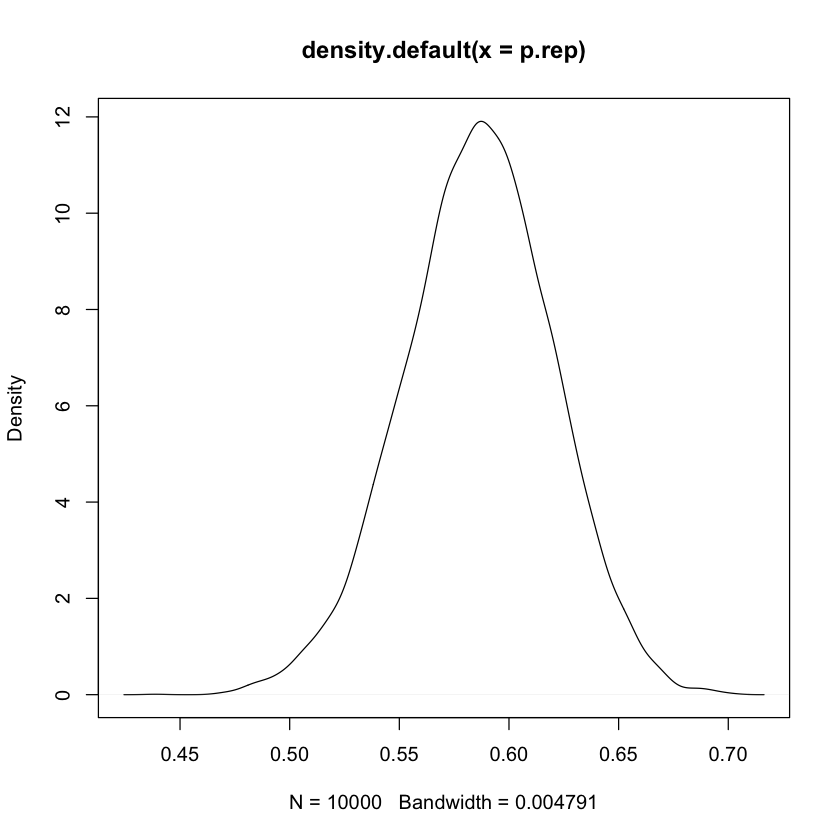

1.00000
0.06200
1.60173
1.00000
0.00000
0.00000
0.00000
0.00000
1.00000
1.00000
42.00000


[1] 16  1

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.4342019,0.4271859,0.4200595,0.4128292,0.4055021,0.3980855,0.3905869,0.3830145,0.3753764,0.3676814,,0.3521558,0.3443433,0.3365100,0.3286651,0.3208181,0.3129783,0.3051549,0.2973571,0.2895939,0.2818741
0.4341614,0.4225155,0.4108265,0.3991111,0.3873868,0.3756712,0.3639821,0.3523377,0.3407559,0.3292546,,0.3065641,0.2954088,0.2844020,0.2735591,0.2628949,0.2524230,0.2421564,0.2321068,0.2222848,0.2127001
0.5211125,0.5037041,0.4862449,0.4687780,0.4513466,0.4339939,0.4167626,0.3996942,0.3828289,0.3662051,,0.3338247,0.3181333,0.3028130,0.2878892,0.2733839,0.2593162,0.2457018,0.2325532,0.2198799,0.2076884
0.4731338,0.4634689,0.4537132,0.4438765,0.4339692,0.4240022,0.4139866,0.4039342,0.3938569,0.3837668,,0.3635985,0.3535453,0.3435297,0.3335641,0.3236610,0.3138326,0.3040907,0.2944471,0.2849128,0.2754987
0.5846352,0.5570572,0.5290903,0.5009070,0.4726859,0.4446067,0.4168462,0.3895733,0.3629455,0.3371052,,0.2882659,0.2654563,0.2438116,0.2233750,0.2041702,0.1862035,0.1694654,0.1539330,0.1395719,0.1263386
0.5056802,0.4869290,0.4680827,0.4491970,0.4303290,0.4115365,0.3928769,0.3744069,0.3561817,0.3382542,,0.3034885,0.2867394,0.2704652,0.2546992,0.2394702,0.2248017,0.2107123,0.1972159,0.1843212,0.1720327


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.3492624,0.3602573,0.3714006,0.3826820,0.3940910,0.4056164,0.4172465,0.4289691,0.4407717,0.4526413,,0.4765286,0.4885191,0.5005226,0.5125251,0.5245130,0.5364725,0.5483898,0.5602516,0.5720447,0.5837563
0.3378510,0.3513358,0.3650430,0.3789529,0.3930447,0.4072966,0.4216855,0.4361878,0.4507789,0.4654338,,0.4948332,0.5095265,0.5241816,0.5387734,0.5532773,0.5676694,0.5819267,0.5960269,0.6099492,0.6236736
0.3217544,0.3364655,0.3513921,0.3665018,0.3817606,0.3971335,0.4125851,0.4280797,0.4435815,0.4590554,,0.4897824,0.5049701,0.5199996,0.5348424,0.5494719,0.5638637,0.5779959,0.5918487,0.6054048,0.6186493
0.3211286,0.3327356,0.3445432,0.3565399,0.3687131,0.3810495,0.3935349,0.4061544,0.4188926,0.4317331,,0.4576540,0.4706998,0.4837788,0.4968732,0.5099648,0.5230359,0.5360686,0.5490452,0.5619485,0.5747616
0.2806444,0.3016527,0.3232014,0.3451728,0.3674415,0.3898770,0.4123476,0.4347232,0.4568789,0.4786975,,0.5209081,0.5411241,0.5606532,0.5794426,0.5974537,0.6146613,0.6310521,0.6466241,0.6613846,0.6753492
0.2812872,0.2978051,0.3147614,0.3321148,0.3498198,0.3678278,0.3860869,0.4045432,0.4231410,0.4418238,,0.4792180,0.4978181,0.5162821,0.5345591,0.5526015,0.5703646,0.5878080,0.6048947,0.6215922,0.6378723


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.2165357,0.2125568,0.2085400,0.2044888,0.2004068,0.1962981,0.1921666,0.1880164,0.1838519,0.1796773,,0.1713157,0.1671376,0.1629675,0.1588097,0.1546688,0.1505492,0.1464553,0.1423913,0.1383614,0.1343696
0.2279876,0.2261487,0.2241306,0.2219360,0.2195685,0.2170323,0.2143324,0.2114745,0.2084652,0.2053116,,0.1986027,0.1950647,0.1914164,0.1876675,0.1838278,0.1799075,0.1759169,0.1718663,0.1677660,0.1636263
0.1571331,0.1598304,0.1623629,0.1647202,0.1668928,0.1688725,0.1706522,0.1722261,0.1735896,0.1747395,,0.1763929,0.1768966,0.1771874,0.1772685,0.1771442,0.1768201,0.1763023,0.1755981,0.1747153,0.1736623
0.2057376,0.2037955,0.2017436,0.1995836,0.1973177,0.1949484,0.1924785,0.1899114,0.1872506,0.1845001,,0.1787475,0.1757549,0.1726915,0.1695627,0.1663741,0.1631315,0.1598407,0.1565077,0.1531387,0.1497397
0.1347204,0.1412900,0.1477083,0.1539201,0.1598726,0.1655163,0.1708062,0.1757035,0.1801755,0.1841972,,0.1908259,0.1934196,0.1955352,0.1971825,0.1983761,0.1991352,0.1994824,0.1994429,0.1990435,0.1983122
0.2130326,0.2152659,0.2171559,0.2186882,0.2198511,0.2206357,0.2210362,0.2210499,0.2206773,0.2199220,,0.2172935,0.2154425,0.2132528,0.2107417,0.2079284,0.2048337,0.2014797,0.1978894,0.1940866,0.1900950


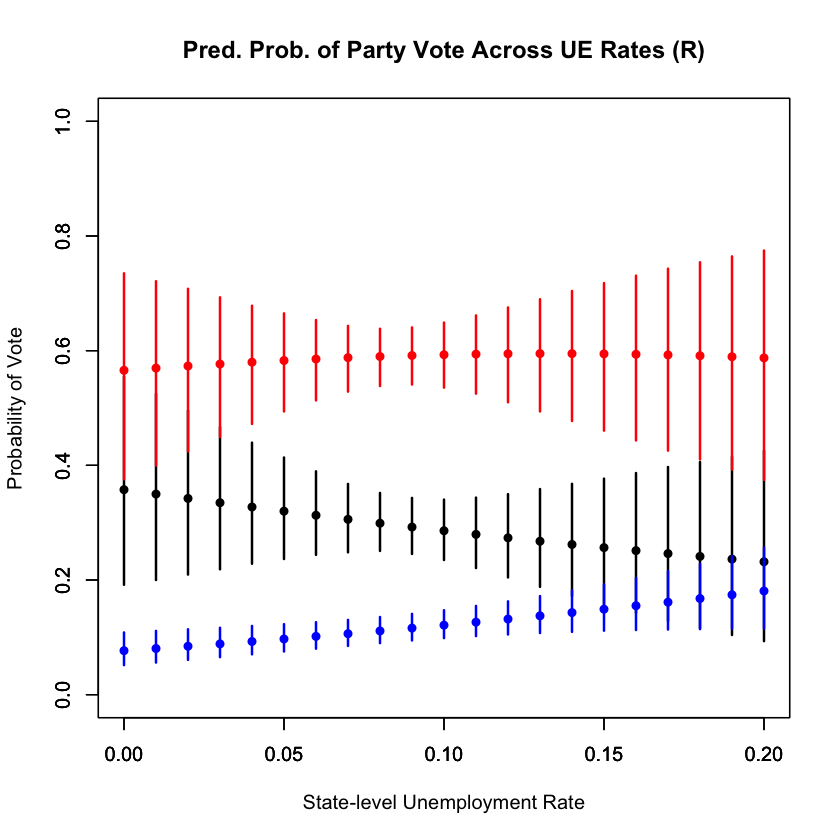


Call:
mlogit(formula = partyvote ~ 0 | uerate + totalspend_voter_inf + 
    democrat + republican + black + hisp + other + female + married + 
    age + educ + income + unemployed + factor(year), data = anes.data.sh.ml, 
    reflevel = "Abstain", method = "nr")

Frequencies of alternatives:
   Abstain   Democrat Republican 
   0.49238    0.28307    0.22455 

nr method
6 iterations, 0h:0m:1s 
g'(-H)^-1g = 0.000518 
successive function values within tolerance limits 

Coefficients :
                                  Estimate Std. Error  z-value  Pr(>|z|)    
Democrat:(intercept)            -5.7339811  0.3834769 -14.9526 < 2.2e-16 ***
Republican:(intercept)          -6.9366828  0.4316407 -16.0705 < 2.2e-16 ***
Democrat:uerate                 -1.6303861  2.4802707  -0.6573 0.5109610    
Republican:uerate                1.8534881  2.7987799   0.6622 0.5078119    
Democrat:totalspend_voter_inf    0.0729626  0.0185833   3.9262 8.628e-05 ***
Republican:totalspend_voter_inf  0.0690003  0.02100


t test of coefficients:

                                  Estimate Std. Error  t value  Pr(>|t|)    
Democrat:(intercept)            -5.7339811  0.4760897 -12.0439 < 2.2e-16 ***
Republican:(intercept)          -6.9366828  0.5369104 -12.9196 < 2.2e-16 ***
Democrat:uerate                 -1.6303861  3.6283371  -0.4493 0.6532006    
Republican:uerate                1.8534881  3.2382510   0.5724 0.5670955    
Democrat:totalspend_voter_inf    0.0729626  0.0267100   2.7317 0.0063243 ** 
Republican:totalspend_voter_inf  0.0690003  0.0427148   1.6154 0.1062950    
Democrat:democrat                1.3151310  0.1252839  10.4972 < 2.2e-16 ***
Republican:democrat              0.2964783  0.2236905   1.3254 0.1851020    
Democrat:republican              0.1414824  0.1282596   1.1031 0.2700408    
Republican:republican            1.5314105  0.1668130   9.1804 < 2.2e-16 ***
Democrat:black                   0.3212082  0.1544054   2.0803 0.0375509 *  
Republican:black                -1.2794850  0.3145

[1] 34 34

,fips_state,year,age,educ,black,hisp,other,female,married,republican,democrat,unemployed,partyvote,income,incomedk,uerate,state,totalspend,vep,totalspend_voter_inf
1,1,1982,77,3,0,0,0,1,1,1,0,0,Republican,4,0,0.141,AL,6451471,2780689,2.320098
3,1,1982,27,5,0,0,0,1,0,0,1,0,Republican,4,0,0.141,AL,6451471,2780689,2.320098
4,1,1982,42,3,1,0,0,1,0,0,1,0,Democrat,3,0,0.141,AL,6451471,2780689,2.320098
5,1,1982,31,4,0,0,0,1,1,0,0,1,Democrat,5,0,0.141,AL,6451471,2780689,2.320098
6,1,1982,67,3,0,0,0,1,1,0,1,0,Democrat,3,0,0.141,AL,6451471,2780689,2.320098
7,1,1982,54,3,1,0,0,1,0,0,1,0,Democrat,2,0,0.141,AL,6451471,2780689,2.320098



1982 1986 1990 1998 
 941 1581 1485  914 

[1] 2

1.000000
0.061000
2.661248
0.000000
1.000000
0.000000
0.000000
0.000000
1.000000
1.000000
41.000000


[1] 15  1

[1] 10000    34

Democrat:(intercept),Republican:(intercept),Democrat:uerate,Republican:uerate,Democrat:totalspend_voter_inf,Republican:totalspend_voter_inf,Democrat:democrat,Republican:democrat,Democrat:republican,Republican:republican,⋯,Democrat:income,Republican:income,Democrat:unemployed,Republican:unemployed,Democrat:factor(year)1986,Republican:factor(year)1986,Democrat:factor(year)1990,Republican:factor(year)1990,Democrat:factor(year)1998,Republican:factor(year)1998
-6.342283,-6.598977,2.1327702,-0.8143496,0.05350639,0.07607694,1.410717,0.2537515,0.2998443,1.518630,,0.2538145,0.2441116,-0.23893713,-0.5091875,-0.04313283,-0.63972375,-0.5118389,-0.8868579,-0.44550475,-0.32521103
-5.823038,-6.605885,-4.0122747,-0.7681067,0.04232679,0.09002642,1.178634,-0.0487298,0.2401856,1.485984,,0.2617020,0.2667733,0.08468301,-0.4945895,-0.15601623,-0.57288615,-0.7030155,-0.4998069,-1.17153313,-0.11721508
-6.263378,-6.452592,3.0417444,-2.9436363,0.10985731,0.07213432,1.295066,0.2714414,0.1897747,1.632603,,0.2454940,0.2606672,-0.50661084,-0.1486320,-0.26978008,-0.38468064,-0.5219957,-0.9219907,-0.67519831,-0.50533426
-6.120449,-6.914791,3.0780963,0.9417798,0.03854379,0.05930654,1.310993,0.1967775,0.2462173,1.472498,,0.2734850,0.3219737,0.04611527,-0.5277221,-0.12915167,-0.26993995,-0.3801374,-0.2961461,-0.50378571,-0.01150594
-6.569648,-7.616212,6.1335308,4.4429263,0.01866669,0.13447077,1.510908,0.2541779,0.3427837,1.349912,,0.2344068,0.2930777,-0.27318892,-0.4850812,0.08556182,-0.08984191,-0.2903276,-0.1652802,-0.05356707,0.16238592
-6.208099,-7.576742,-0.3958699,4.2072488,0.10624255,0.11140245,1.101038,0.2411086,0.1018067,1.661973,,0.2596627,0.2913916,-0.39479596,-0.6394880,-0.45105947,-0.42776699,-0.7659544,-0.3151498,-1.03191793,0.15101301


[1] 10000    15

[1] 10000    15

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.5422525,0.5230485,0.5091773,0.5235186,0.5609433,0.5842844,0.5926912,0.5358455,0.5772142,0.5154089,,0.5430242,0.5937395,0.494874,0.5266576,0.5903701,0.5550748,0.5165304,0.5768531,0.563677,0.5613079


[1] 0.5418062

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.1443894,0.1904726,0.113759,0.1391409,0.137021,0.1423025,0.1250034,0.1343783,0.1591618,0.1086795,,0.09555998,0.1273647,0.1513349,0.1405027,0.1468665,0.1283618,0.130488,0.1495125,0.1577481,0.1291682


[1] 0.1264777

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.3133581,0.2864789,0.3770637,0.3373405,0.3020356,0.2734131,0.2823054,0.3297762,0.263624,0.3759116,,0.3614159,0.2788958,0.3537912,0.3328397,0.2627634,0.3165634,0.3529816,0.2736345,0.2785749,0.309524


[1] 0.3317161

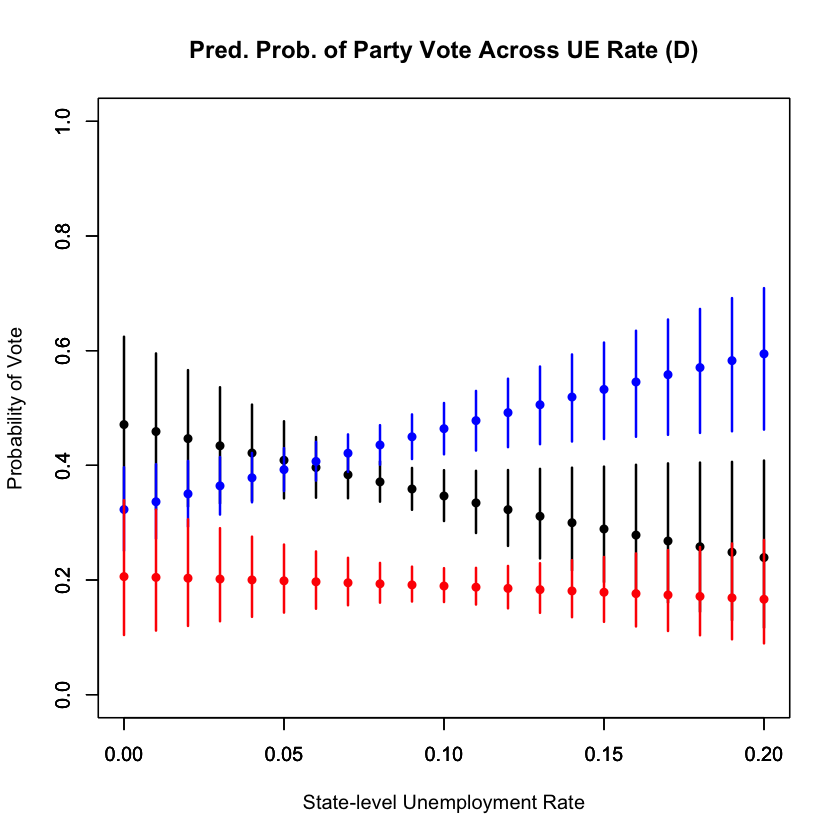

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.5431514,0.5431177,0.5430402,0.5429183,0.5427515,0.5425392,0.5422809,0.5419761,0.5416242,0.5412248,,0.5402814,0.5397364,0.5391419,0.5384976,0.5378030,0.5370576,0.5362611,0.5354130,0.5345131,0.5335610
0.4904069,0.4959240,0.5013773,0.5067658,0.5120884,0.5173445,0.5225334,0.5276544,0.5327071,0.5376913,,0.5474528,0.5522299,0.5569381,0.5615773,0.5661477,0.5706498,0.5750837,0.5794499,0.5837489,0.5879812
0.4826779,0.4873768,0.4919447,0.4963756,0.5006635,0.5048027,0.5087875,0.5126123,0.5162717,0.5197606,,0.5262067,0.5291544,0.5319127,0.5344773,0.5368443,0.5390101,0.5409712,0.5427247,0.5442675,0.5455973
0.5468431,0.5430884,0.5393064,0.5354974,0.5316613,0.5277985,0.5239090,0.5199930,0.5160509,0.5120828,,0.5040697,0.5000254,0.4959563,0.4918628,0.4877452,0.4836040,0.4794395,0.4752523,0.4710428,0.4668115
0.6334549,0.6219185,0.6102283,0.5983957,0.5864328,0.5743521,0.5621671,0.5498914,0.5375393,0.5251254,,0.5001728,0.4876648,0.4751563,0.4626630,0.4502006,0.4377844,0.4254298,0.4131518,0.4009651,0.3888839
0.6205297,0.6149695,0.6092585,0.6033971,0.5973865,0.5912279,0.5849229,0.5784735,0.5718820,0.5651511,,0.5512832,0.5441534,0.5368983,0.5295224,0.5220304,0.5144275,0.5067191,0.4989110,0.4910093,0.4830203


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.12698526,0.12971460,0.13249192,0.1353176,0.1381922,0.1411159,0.1440893,0.1471127,0.1501864,0.1533107,,0.1597129,0.1629912,0.1663214,0.1697037,0.1731383,0.1766254,0.1801653,0.1837580,0.1874038,0.1911026
0.22810777,0.22160195,0.21522764,0.2089852,0.2028748,0.1968965,0.1910500,0.1853350,0.1797510,0.1742973,,0.1637775,0.1587093,0.1537674,0.1489505,0.1442570,0.1396856,0.1352347,0.1309025,0.1266873,0.1225872
0.08957616,0.09324167,0.09702231,0.1009197,0.1049353,0.1090705,0.1133267,0.1177050,0.1222065,0.1268322,,0.1364592,0.1414617,0.1465909,0.1518469,0.1572300,0.1627399,0.1683765,0.1741393,0.1800279,0.1860415
0.12045939,0.12337196,0.12634252,0.1293717,0.1324601,0.1356082,0.1388167,0.1420861,0.1454168,0.1488093,,0.1557818,0.1593625,0.1630067,0.1667147,0.1704869,0.1743235,0.1782247,0.1821907,0.1862217,0.1903178
0.10643749,0.11110919,0.11591682,0.1208593,0.1259353,0.1311430,0.1364803,0.1419446,0.1475332,0.1532429,,0.1650108,0.1710611,0.1772164,0.1834721,0.1898230,0.1962640,0.2027896,0.2093944,0.2160725,0.2228182
0.15482397,0.15283048,0.15081297,0.1487720,0.1467081,0.1446220,0.1425144,0.1403862,0.1382382,0.1360714,,0.1316857,0.1294691,0.1272382,0.1249944,0.1227391,0.1204736,0.1181995,0.1159184,0.1136318,0.1113413


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.3298633,0.3271677,0.3244679,0.3217641,0.3190563,0.3163449,0.3136298,0.3109113,0.3081894,0.3054645,,0.3000058,0.2972724,0.2945367,0.2917987,0.2890588,0.2863170,0.2835736,0.2808289,0.2780831,0.2753364
0.2814854,0.2824740,0.2833950,0.2842490,0.2850367,0.2857590,0.2864166,0.2870106,0.2875418,0.2880114,,0.2887697,0.2890607,0.2892945,0.2894723,0.2895952,0.2896646,0.2896816,0.2896476,0.2895638,0.2894315
0.4277459,0.4193815,0.4110330,0.4027047,0.3944012,0.3861268,0.3778858,0.3696827,0.3615217,0.3534072,,0.3373341,0.3293838,0.3214964,0.3136758,0.3059257,0.2982501,0.2906523,0.2831360,0.2757045,0.2683612
0.3326975,0.3335397,0.3343510,0.3351309,0.3358786,0.3365933,0.3372743,0.3379209,0.3385324,0.3391079,,0.3401485,0.3406121,0.3410370,0.3414225,0.3417679,0.3420726,0.3423358,0.3425570,0.3427355,0.3428707
0.2601076,0.2669723,0.2738549,0.2807450,0.2876319,0.2945049,0.3013527,0.3081640,0.3149275,0.3216317,,0.3348163,0.3412741,0.3476273,0.3538649,0.3599765,0.3659517,0.3717806,0.3774538,0.3829624,0.3882979
0.2246463,0.2322000,0.2399286,0.2478309,0.2559054,0.2641501,0.2725627,0.2811403,0.2898798,0.2987775,,0.3170311,0.3263775,0.3358635,0.3454832,0.3552305,0.3650989,0.3750813,0.3851706,0.3953589,0.4056384


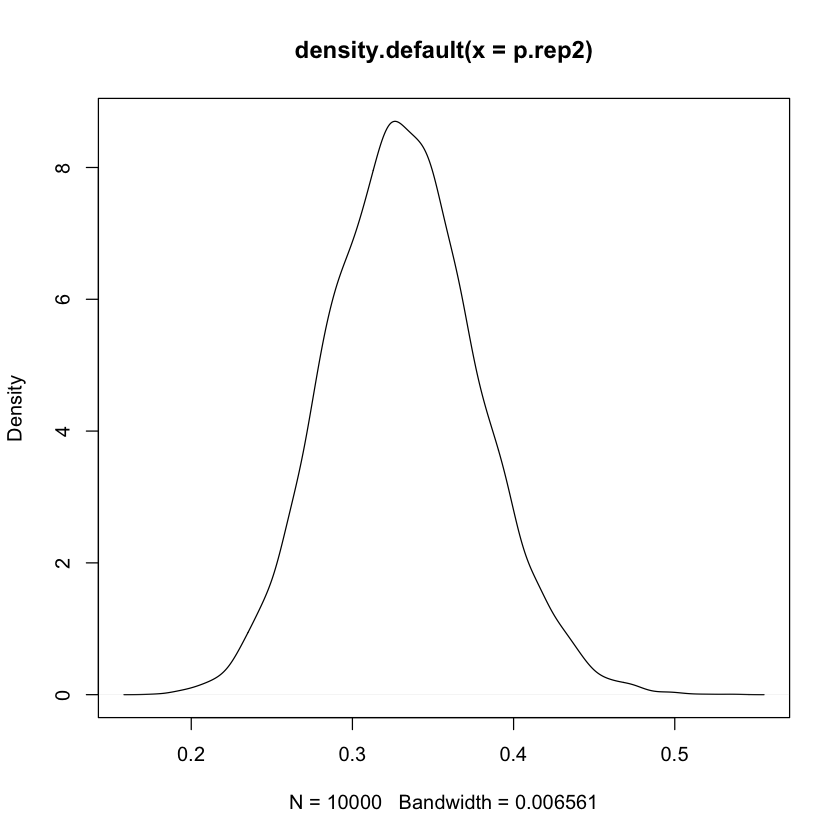

1.000000
0.061000
2.661248
1.000000
0.000000
0.000000
0.000000
0.000000
1.000000
1.000000
41.000000


[1] 15  1

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.5315017,0.5275995,0.5236606,0.5196859,0.5156767,0.5116338,0.5075584,0.5034517,0.4993147,0.4951485,,0.4867336,0.4824872,0.4782165,0.4739227,0.4696070,0.4652708,0.4609152,0.4565416,0.4521513,0.4477455
0.4324125,0.4415202,0.4506445,0.4597787,0.4689157,0.4780488,0.4871710,0.4962755,0.5053557,0.5144048,,0.5323837,0.5413008,0.5501615,0.5589598,0.5676900,0.5763465,0.5849241,0.5934176,0.6018222,0.6101332
0.5593895,0.5560550,0.5525384,0.5488439,0.5449762,0.5409399,0.5367399,0.5323814,0.5278696,0.5232098,,0.5134687,0.5083988,0.5032038,0.4978895,0.4924621,0.4869275,0.4812919,0.4755615,0.4697424,0.4638408
0.5528711,0.5463532,0.5398008,0.5332163,0.5266019,0.5199603,0.5132938,0.5066051,0.4998967,0.4931713,,0.4796801,0.4729198,0.4661533,0.4593835,0.4526130,0.4458447,0.4390815,0.4323260,0.4255811,0.4188496
0.5960776,0.5820549,0.5678870,0.5535959,0.5392046,0.5247366,0.5102160,0.4956673,0.4811152,0.4665845,,0.4376857,0.4233659,0.4091639,0.3951023,0.3812027,0.3674859,0.3539715,0.3406777,0.3276216,0.3148188
0.5665310,0.5661847,0.5657839,0.5653264,0.5648102,0.5642334,0.5635938,0.5628892,0.5621174,0.5612762,,0.5593764,0.5583132,0.5571712,0.5559481,0.5546414,0.5532488,0.5517676,0.5501956,0.5485302,0.5467689


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.3773837,0.3826884,0.3880193,0.3933752,0.3987548,0.4041571,0.4095808,0.4150246,0.4204872,0.4259675,,0.4369758,0.4425011,0.4480388,0.4535875,0.4591458,0.4647124,0.4702860,0.4758651,0.4814484,0.4870345
0.5140965,0.5042802,0.4944590,0.4846408,0.4748329,0.4650431,0.4552787,0.4455471,0.4358558,0.4262119,,0.4070945,0.3976345,0.3882491,0.3789446,0.3697272,0.3606025,0.3515762,0.3426536,0.3338397,0.3251392
0.3135244,0.3212809,0.3291089,0.3370049,0.3449650,0.3529853,0.3610619,0.3691907,0.3773676,0.3855884,,0.4021447,0.4104715,0.4188249,0.4272005,0.4355938,0.4440003,0.4524157,0.4608355,0.4692553,0.4776706
0.3532058,0.3599527,0.3667529,0.3736039,0.3805033,0.3874486,0.3944373,0.4014667,0.4085341,0.4156366,,0.4299359,0.4371269,0.4443414,0.4515765,0.4588292,0.4660963,0.4733748,0.4806615,0.4879534,0.4952473
0.3221006,0.3344184,0.3469171,0.3595790,0.3723854,0.3853168,0.3983532,0.4114737,0.4246571,0.4378822,,0.4643703,0.4775904,0.4907662,0.5038769,0.5169023,0.5298229,0.5426201,0.5552760,0.5677738,0.5800976
0.3839369,0.3821863,0.3804068,0.3785975,0.3767574,0.3748856,0.3729812,0.3710431,0.3690705,0.3670622,,0.3629349,0.3608138,0.3586532,0.3564520,0.3542093,0.3519239,0.3495951,0.3472218,0.3448031,0.3423381


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.09111457,0.08971206,0.08832012,0.08693889,0.08556850,0.08420909,0.08286081,0.08152376,0.08019810,0.07888393,,0.07629061,0.07501168,0.07374472,0.07248985,0.07124717,0.07001678,0.06879877,0.06759325,0.06640030,0.06522001
0.05349091,0.05419964,0.05489643,0.05558057,0.05625137,0.05690818,0.05755036,0.05817731,0.05878846,0.05938327,,0.06052185,0.06106470,0.06158939,0.06209555,0.06258284,0.06305099,0.06349973,0.06392885,0.06433819,0.06472760
0.12708608,0.12266407,0.11835266,0.11415117,0.11005885,0.10607484,0.10219820,0.09842789,0.09476280,0.09120173,,0.08438652,0.08112965,0.07797132,0.07491002,0.07194418,0.06907217,0.06629234,0.06360297,0.06100233,0.05848865
0.09392310,0.09369407,0.09344633,0.09317989,0.09289479,0.09259109,0.09226886,0.09192820,0.09156924,0.09119210,,0.09038396,0.08995332,0.08950527,0.08904002,0.08855784,0.08805900,0.08754378,0.08701250,0.08646548,0.08590306
0.08182179,0.08352673,0.08519592,0.08682508,0.08840998,0.08994654,0.09143081,0.09285903,0.09422764,0.09553333,,0.09794398,0.09904366,0.10006990,0.10102086,0.10189501,0.10269115,0.10340843,0.10404633,0.10460465,0.10508351
0.04953212,0.05162895,0.05380933,0.05607614,0.05843234,0.06088094,0.06342501,0.06606769,0.06881215,0.07166161,,0.07768869,0.08087297,0.08417556,0.08759987,0.09114930,0.09482729,0.09863725,0.10258260,0.10666672,0.11089299


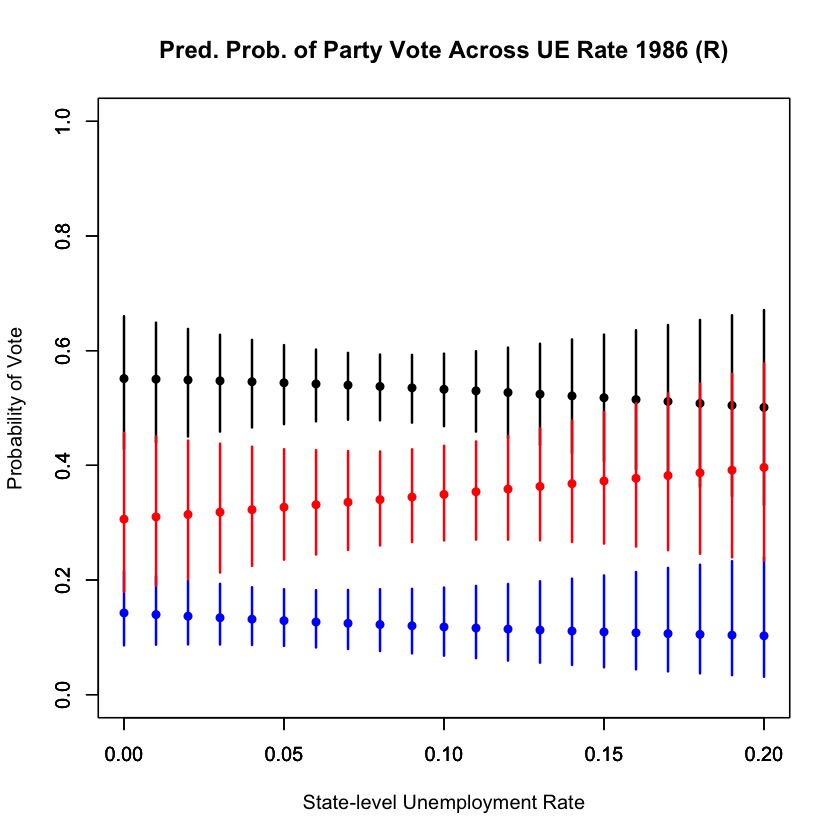

[1] 10000    15

[1] 10000    15

1.000000
0.061000
2.661248
0.000000
1.000000
0.000000
0.000000
0.000000
1.000000
1.000000
41.000000


[1] 15  1

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.6180523,0.5555656,0.6225408,0.5451105,0.5998615,0.587722,0.6065477,0.5974897,0.6302945,0.5850716,,0.6240929,0.6347593,0.5337848,0.5854484,0.5834733,0.5596379,0.5452753,0.5670555,0.5875095,0.5551579


[1] 0.5879794

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.1029918,0.1170758,0.1080808,0.1127212,0.1006172,0.1044728,0.08010249,0.108403,0.09878486,0.08063792,,0.0906277,0.09920645,0.1076911,0.09211164,0.1044554,0.08907656,0.07633795,0.0926359,0.08371434,0.0882344


[1] 0.09284577

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.2789559,0.3273587,0.2693784,0.3421683,0.2995213,0.3078052,0.3133498,0.2941073,0.2709206,0.3342905,,0.2852794,0.2660342,0.3585241,0.3224399,0.3120713,0.3512855,0.3783867,0.3403086,0.3287762,0.3566077


[1] 0.3191748

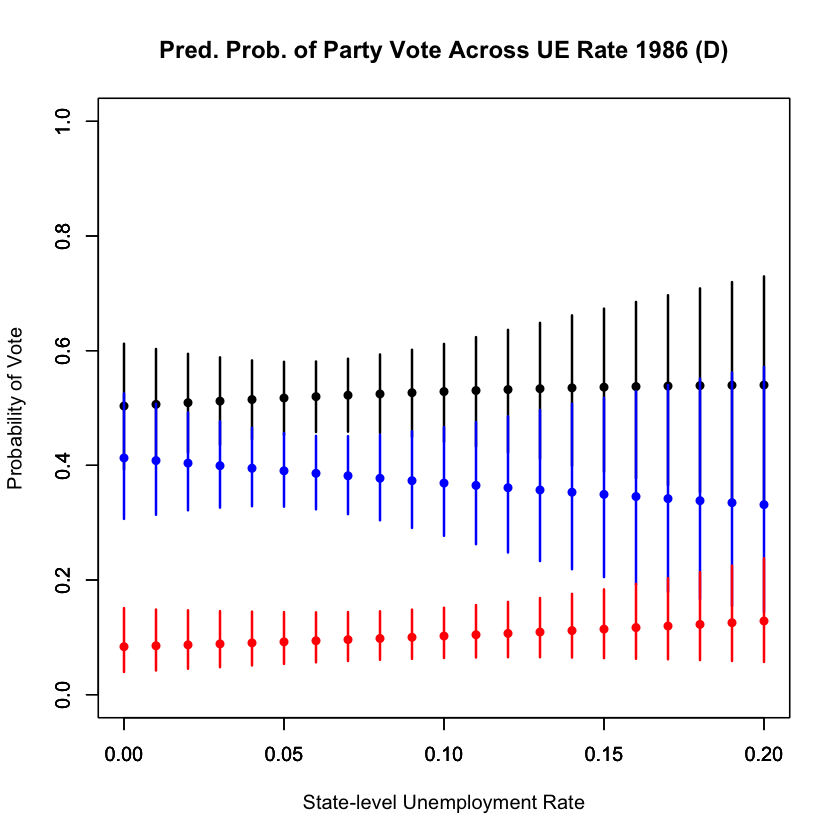

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.6170385,0.6173025,0.6175289,0.6177171,0.6178667,0.6179770,0.6180475,0.6180777,0.6180670,0.6180149,,0.6177844,0.6176049,0.6173818,0.6171147,0.6168030,0.6164462,0.6160438,0.6155953,0.6151002,0.6145580
0.5300346,0.5343712,0.5386480,0.5428654,0.5470236,0.5511232,0.5551646,0.5591483,0.5630748,0.5669448,,0.5745176,0.5782219,0.5818722,0.5854695,0.5890144,0.5925078,0.5959504,0.5993430,0.6026865,0.6059816
0.6016739,0.6055236,0.6092101,0.6127295,0.6160784,0.6192533,0.6222509,0.6250680,0.6277018,0.6301495,,0.6344760,0.6363502,0.6380288,0.6395101,0.6407923,0.6418740,0.6427538,0.6434307,0.6439038,0.6441723
0.5668785,0.5633765,0.5598484,0.5562942,0.5527139,0.5491075,0.5454751,0.5418168,0.5381326,0.5344227,,0.5269260,0.5231394,0.5193277,0.5154909,0.5116293,0.5077430,0.5038324,0.4998976,0.4959390,0.4919568
0.6683772,0.6575665,0.6465779,0.6354202,0.6241027,0.6126355,0.6010293,0.5892955,0.5774460,0.5654932,,0.5413303,0.5291474,0.5169155,0.5046492,0.4923629,0.4800714,0.4677896,0.4555321,0.4433137,0.4311489
0.6300080,0.6234521,0.6167454,0.6098901,0.6028885,0.5957435,0.5884581,0.5810360,0.5734810,0.5657973,,0.5500630,0.5420226,0.5338741,0.5256236,0.5172773,0.5088420,0.5003244,0.4917317,0.4830713,0.4743509


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.09027930,0.09226489,0.09428839,0.09635030,0.09845113,0.10059137,0.1027715,0.1049921,0.1072535,0.10955632,,0.11428794,0.11671769,0.11919068,0.12170737,0.12426818,0.12687357,0.12952395,0.13221973,0.13496133,0.13774914
0.14266881,0.13817922,0.13380726,0.12955127,0.12540953,0.12138026,0.1174616,0.1136518,0.1099487,0.10635055,,0.09946085,0.09616527,0.09296646,0.08986236,0.08685092,0.08393004,0.08109767,0.07835174,0.07569018,0.07311096
0.08676815,0.09002028,0.09336551,0.09680513,0.10034036,0.10397242,0.1077024,0.1115315,0.1154605,0.11949064,,0.12785736,0.13219556,0.13663789,0.14118494,0.14583723,0.15059515,0.15545905,0.16042914,0.16550555,0.17068832
0.09715523,0.09957331,0.10204287,0.10456462,0.10713925,0.10976746,0.1124499,0.1151873,0.1179803,0.12082954,,0.12669919,0.12972083,0.13280112,0.13594063,0.13913989,0.14239942,0.14571972,0.14910126,0.15254448,0.15604979
0.07711766,0.08066952,0.08433896,0.08812638,0.09203194,0.09605551,0.1001967,0.1044548,0.1088289,0.11331773,,0.12263318,0.12745588,0.13238550,0.13741938,0.14255463,0.14778809,0.15311640,0.15853593,0.16404291,0.16963334
0.11472671,0.11308430,0.11142584,0.10975197,0.10806337,0.10636079,0.1046450,0.1029169,0.1011774,0.09942743,,0.09590014,0.09412499,0.09234368,0.09055740,0.08876736,0.08697482,0.08518106,0.08338738,0.08159512,0.07980560


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.2926822,0.2904326,0.2881827,0.2859326,0.2836822,0.2814317,0.2791810,0.2769302,0.2746795,0.2724288,,0.2679277,0.2656774,0.2634275,0.2611779,0.2589288,0.2566802,0.2544323,0.2521850,0.2499385,0.2476928
0.3272966,0.3274496,0.3275447,0.3275833,0.3275668,0.3274965,0.3273738,0.3272000,0.3269765,0.3267047,,0.3260215,0.3256129,0.3251613,0.3246681,0.3241346,0.3235622,0.3229520,0.3223053,0.3216234,0.3209074
0.3115579,0.3044561,0.2974244,0.2904653,0.2835812,0.2767743,0.2700467,0.2634005,0.2568376,0.2503599,,0.2376667,0.2314543,0.2253333,0.2193049,0.2133704,0.2075308,0.2017871,0.1961402,0.1905907,0.1851393
0.3359663,0.3370502,0.3381087,0.3391412,0.3401468,0.3411250,0.3420749,0.3429958,0.3438870,0.3447478,,0.3463748,0.3471397,0.3478712,0.3485684,0.3492308,0.3498575,0.3504479,0.3510011,0.3515165,0.3519934
0.2545051,0.2617640,0.2690832,0.2764535,0.2838654,0.2913090,0.2987740,0.3062497,0.3137251,0.3211891,,0.3360365,0.3433967,0.3506990,0.3579314,0.3650825,0.3721405,0.3790940,0.3859320,0.3926434,0.3992178
0.2552653,0.2634636,0.2718287,0.2803579,0.2890481,0.2978957,0.3068968,0.3160471,0.3253416,0.3347752,,0.3540369,0.3638525,0.3737822,0.3838190,0.3939553,0.4041832,0.4144946,0.4248809,0.4353336,0.4458435


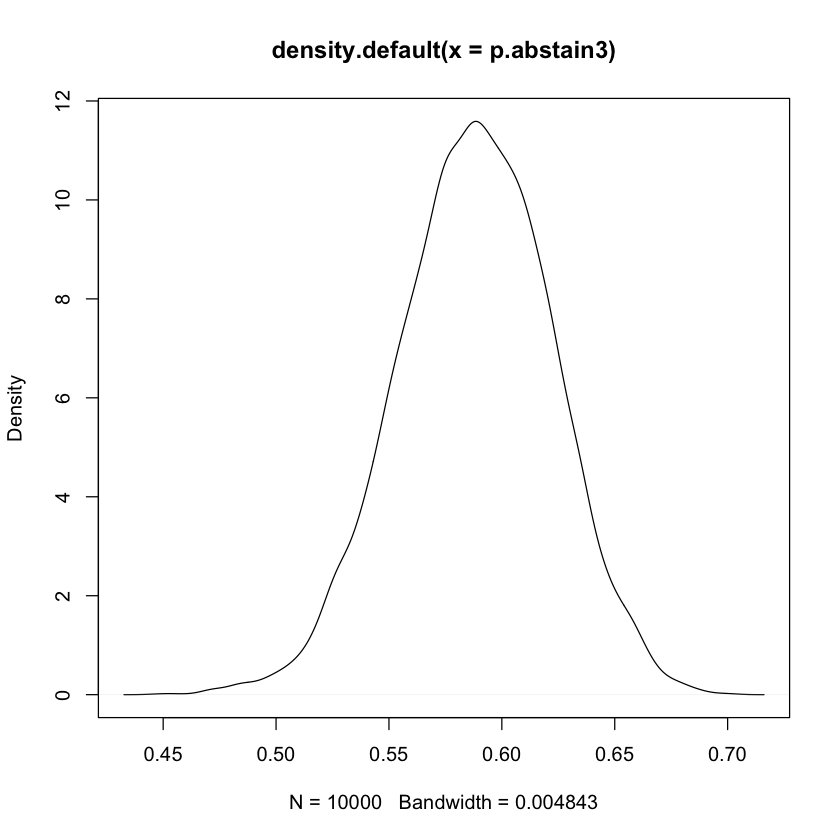

1.000000
0.061000
2.661248
1.000000
0.000000
0.000000
0.000000
0.000000
1.000000
1.000000
41.000000


[1] 15  1

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.6336178,0.6302264,0.6267866,0.6232987,0.6197634,0.6161811,0.6125523,0.6088778,0.6051580,0.6013937,,0.5937341,0.5898404,0.5859049,0.5819286,0.5779122,0.5738566,0.5697627,0.5656314,0.5614636,0.5572602
0.5491244,0.5577231,0.5662513,0.5747041,0.5830763,0.5913632,0.5995604,0.6076636,0.6156688,0.6235722,,0.6390601,0.6466383,0.6541025,0.6614500,0.6686788,0.6757869,0.6827726,0.6896345,0.6963715,0.7029825
0.6376402,0.6337605,0.6297186,0.6255178,0.6211617,0.6166538,0.6119979,0.6071977,0.6022575,0.5971811,,0.5866372,0.5811784,0.5756011,0.5699099,0.5641094,0.5582046,0.5522001,0.5461010,0.5399123,0.5336388
0.6014890,0.5953641,0.5891889,0.5829652,0.5766947,0.5703793,0.5640210,0.5576219,0.5511841,0.5447096,,0.5316601,0.5250897,0.5184920,0.5118695,0.5052247,0.4985602,0.4918786,0.4851824,0.4784745,0.4717573
0.6674004,0.6546193,0.6415985,0.6283529,0.6148991,0.6012547,0.5874386,0.5734707,0.5593720,0.5451644,,0.5165129,0.5021159,0.4877032,0.4732989,0.4589269,0.4446113,0.4303754,0.4162425,0.4022349,0.3883742
0.6279510,0.6270648,0.6261072,0.6250760,0.6239686,0.6227827,0.6215157,0.6201652,0.6187286,0.6172034,,0.6138767,0.6120700,0.6101643,0.6081570,0.6060455,0.6038272,0.6014995,0.5990599,0.5965061,0.5938354


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.2815460,0.2860758,0.2906476,0.2952608,0.2999148,0.3046091,0.3093430,0.3141157,0.3189267,0.3237751,,0.3335812,0.3385373,0.3435276,0.3485513,0.3536075,0.3586951,0.3638133,0.3689611,0.3741374,0.3793413
0.3777969,0.3686219,0.3595396,0.3505554,0.3416746,0.3329021,0.3242426,0.3157005,0.3072799,0.2989845,,0.2827831,0.2748831,0.2671205,0.2594977,0.2520164,0.2446786,0.2374856,0.2304385,0.2235383,0.2167856
0.2777134,0.2845486,0.2914660,0.2984635,0.3055387,0.3126894,0.3199129,0.3272067,0.3345679,0.3419939,,0.3570279,0.3646298,0.3722840,0.3799873,0.3877362,0.3955274,0.4033572,0.4112221,0.4191184,0.4270425
0.2989716,0.3051778,0.3114532,0.3177963,0.3242053,0.3306785,0.3372140,0.3438097,0.3504636,0.3571736,,0.3707527,0.3776172,0.3845283,0.3914836,0.3984803,0.4055159,0.4125876,0.4196927,0.4268282,0.4339912
0.2476443,0.2582667,0.2691414,0.2802582,0.2916058,0.3031715,0.3149415,0.3269010,0.3390341,0.3513239,,0.3763020,0.3889529,0.4016855,0.4144800,0.4273161,0.4401734,0.4530315,0.4658702,0.4786695,0.4914100
0.3106024,0.3089387,0.3072482,0.3055302,0.3037840,0.3020086,0.3002035,0.2983677,0.2965004,0.2946010,,0.2907024,0.2887017,0.2866657,0.2845938,0.2824852,0.2803392,0.2781552,0.2759326,0.2736707,0.2713691


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.08483625,0.08369780,0.08256585,0.08144048,0.08032178,0.07920983,0.07810472,0.07700652,0.07591533,0.07483124,,0.07268465,0.07162234,0.07056746,0.06952009,0.06848033,0.06744826,0.06642395,0.06540749,0.06439897,0.06339846
0.07307863,0.07365503,0.07420910,0.07474056,0.07524915,0.07573467,0.07619694,0.07663585,0.07705131,0.07744329,,0.07815685,0.07847855,0.07877700,0.07905236,0.07930480,0.07953455,0.07974186,0.07992698,0.08009023,0.08023193
0.08464641,0.08169095,0.07881543,0.07601869,0.07329955,0.07065681,0.06808923,0.06559559,0.06317462,0.06082505,,0.05633495,0.05419182,0.05211489,0.05010284,0.04815434,0.04626808,0.04444271,0.04267691,0.04096935,0.03931871
0.09953940,0.09945809,0.09935784,0.09923851,0.09910000,0.09894220,0.09876503,0.09856843,0.09835236,0.09811678,,0.09758712,0.09729309,0.09697967,0.09664691,0.09629493,0.09592384,0.09553377,0.09512489,0.09469738,0.09425143
0.08495524,0.08711399,0.08926019,0.09138891,0.09349515,0.09557385,0.09761992,0.09962828,0.10159387,0.10351174,,0.10718503,0.10893121,0.11061125,0.11222111,0.11375697,0.11521534,0.11659306,0.11788731,0.11909560,0.12021584
0.06144663,0.06399655,0.06664457,0.06939380,0.07224744,0.07520870,0.07828085,0.08146717,0.08477100,0.08819567,,0.09542097,0.09922832,0.10316994,0.10724917,0.11146931,0.11583360,0.12034527,0.12500745,0.12982321,0.13479551


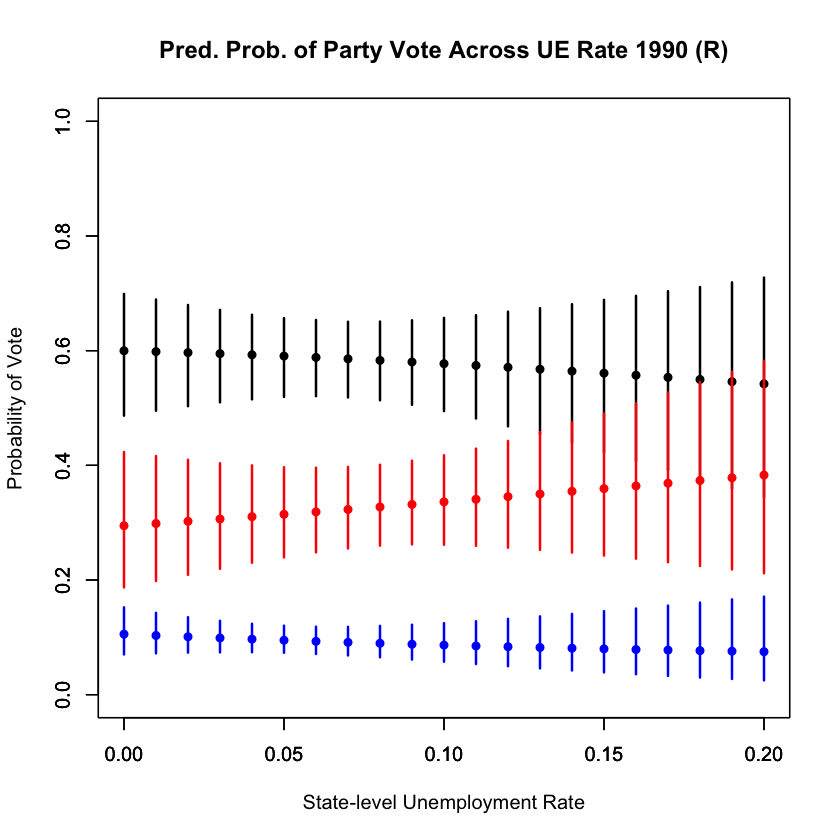

[1] 10000    15

[1] 10000    15

1.000000
0.061000
2.661248
0.000000
1.000000
0.000000
0.000000
0.000000
1.000000
1.000000
41.000000


[1] 15  1

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.5077352,0.50106,0.5539189,0.4957533,0.5248083,0.5073579,0.4866252,0.5127643,0.4455484,0.6114949,,0.5149161,0.5385477,0.4396049,0.5218041,0.4192884,0.5239484,0.5571705,0.5444774,0.6162419,0.4442653


[1] 0.5134217

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.09041136,0.06609169,0.08250724,0.09059138,0.1115439,0.06912562,0.05402312,0.07198705,0.07021496,0.09000339,,0.06551579,0.07665747,0.1037372,0.08740548,0.07826285,0.08339088,0.08783859,0.08475501,0.08061974,0.07271725


[1] 0.07816912

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

0.4018535,0.4328483,0.3635739,0.4136553,0.3636478,0.4235165,0.4593516,0.4152487,0.4842366,0.2985017,,0.4195681,0.3847948,0.4566579,0.3907904,0.5024488,0.3926607,0.3549909,0.3707676,0.3031383,0.4830174


[1] 0.4084091

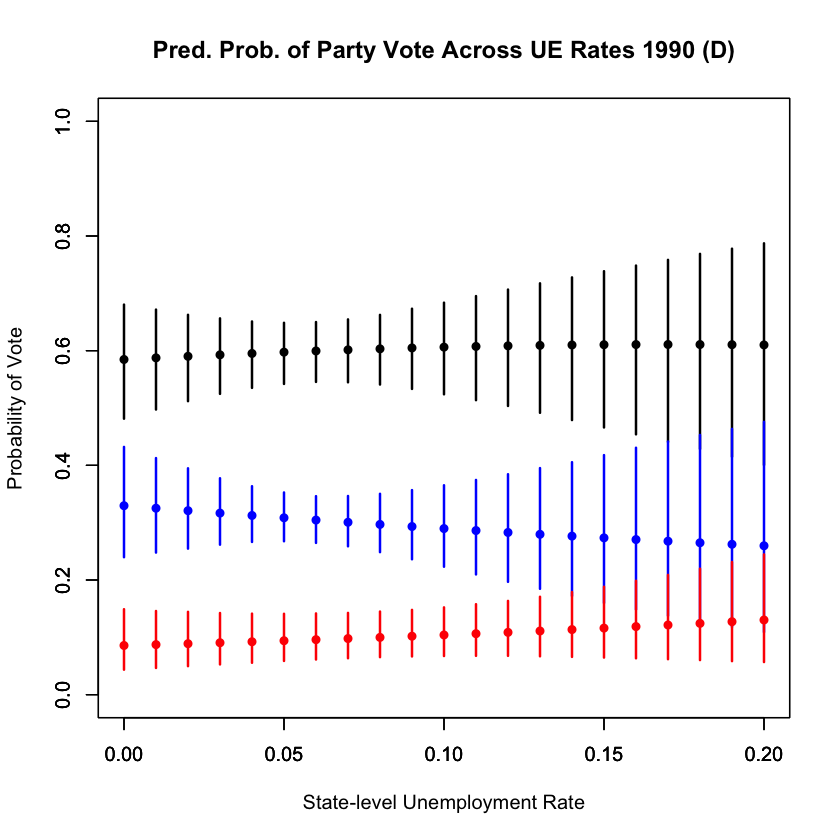

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.5029885,0.5038440,0.5046700,0.5054658,0.5062310,0.5069648,0.5076667,0.5083362,0.5089724,0.5095750,,0.5106765,0.5111742,0.5116357,0.5120604,0.5124478,0.5127971,0.5131078,0.5133793,0.5136110,0.5138023
0.4822100,0.4853822,0.4885216,0.4916286,0.4947037,0.4977475,0.5007604,0.5037429,0.5066956,0.5096189,,0.5153796,0.5182180,0.5210291,0.5238134,0.5265714,0.5293037,0.5320107,0.5346929,0.5373508,0.5399848
0.5237806,0.5290353,0.5341741,0.5391916,0.5440827,0.5488419,0.5534643,0.5579448,0.5622784,0.5664604,,0.5743506,0.5780499,0.5815796,0.5849356,0.5881139,0.5911108,0.5939227,0.5965462,0.5989782,0.6012156
0.5156591,0.5124382,0.5092007,0.5059466,0.5026758,0.4993885,0.4960846,0.4927643,0.4894277,0.4860747,,0.4793202,0.4759189,0.4725017,0.4690687,0.4656201,0.4621560,0.4586765,0.4551819,0.4516723,0.4481478
0.5971497,0.5855224,0.5737870,0.5619557,0.5500412,0.5380565,0.5260150,0.5139303,0.5018164,0.4896873,,0.4654403,0.4533508,0.4413027,0.4293100,0.4173863,0.4055452,0.3937995,0.3821621,0.3706450,0.3592601
0.5601062,0.5517015,0.5431926,0.5345859,0.5258882,0.5171063,0.5082477,0.4993197,0.4903302,0.4812871,,0.4630726,0.4539178,0.4447426,0.4355555,0.4263649,0.4171795,0.4080078,0.3988581,0.3897387,0.3806579


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.07863983,0.08047168,0.08234116,0.08424882,0.08619523,0.08818096,0.09020658,0.09227265,0.09437974,0.09652840,,0.10095268,0.10322940,0.10554991,0.10791474,0.11032442,0.11277949,0.11528046,0.11782784,0.12042215,0.12306387
0.08124308,0.07856135,0.07595978,0.07343651,0.07098964,0.06861732,0.06631772,0.06408900,0.06192936,0.05983701,,0.05584720,0.05394629,0.05210579,0.05032404,0.04859942,0.04693034,0.04531521,0.04375251,0.04224072,0.04077838
0.06480575,0.06747748,0.07023720,0.07308658,0.07602729,0.07906096,0.08218916,0.08541345,0.08873534,0.09215626,,0.09930077,0.10302699,0.10685749,0.11079342,0.11483585,0.11898578,0.12324413,0.12761172,0.13208928,0.13667747
0.07809785,0.08003611,0.08201654,0.08403982,0.08610660,0.08821754,0.09037332,0.09257457,0.09482197,0.09711616,,0.10184747,0.10428586,0.10677359,0.10931128,0.11189952,0.11453892,0.11723006,0.11997354,0.12276990,0.12561970
0.08730502,0.09102005,0.09483788,0.09875767,0.10277834,0.10689856,0.11111678,0.11543124,0.11983994,0.12434065,,0.13360830,0.13836983,0.14321259,0.14813347,0.15312920,0.15819640,0.16333157,0.16853113,0.17379142,0.17910871
0.07817760,0.07670027,0.07521896,0.07373468,0.07224843,0.07076127,0.06927427,0.06778850,0.06630507,0.06482508,,0.06187987,0.06041688,0.05896178,0.05751566,0.05607959,0.05465465,0.05324187,0.05184227,0.05045683,0.04908650


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.4183717,0.4156843,0.4129889,0.4102853,0.4075738,0.4048542,0.4021267,0.3993912,0.3966478,0.3938966,,0.3883709,0.3855964,0.3828144,0.3800248,0.3772278,0.3744234,0.3716117,0.3687928,0.3659668,0.3631338
0.4365469,0.4360564,0.4355186,0.4349349,0.4343067,0.4336352,0.4329219,0.4321681,0.4313751,0.4305441,,0.4287732,0.4278357,0.4268651,0.4258626,0.4248292,0.4237660,0.4226741,0.4215546,0.4204085,0.4192368
0.4114136,0.4034873,0.3955888,0.3877218,0.3798901,0.3720971,0.3643465,0.3566417,0.3489862,0.3413834,,0.3263486,0.3189231,0.3115629,0.3042710,0.2970503,0.2899034,0.2828332,0.2758420,0.2689325,0.2621069
0.4062431,0.4075257,0.4087827,0.4100136,0.4112176,0.4123940,0.4135421,0.4146611,0.4157504,0.4168091,,0.4188323,0.4197952,0.4207247,0.4216200,0.4224804,0.4233051,0.4240934,0.4248446,0.4255578,0.4262325
0.3155453,0.3234576,0.3313752,0.3392866,0.3471804,0.3550449,0.3628682,0.3706384,0.3783436,0.3859720,,0.4009514,0.4082794,0.4154847,0.4225566,0.4294845,0.4362584,0.4428689,0.4493068,0.4555636,0.4616312
0.3617162,0.3715983,0.3815884,0.3916794,0.4018634,0.4121324,0.4224781,0.4328918,0.4433647,0.4538878,,0.4750475,0.4856653,0.4962956,0.5069289,0.5175555,0.5281658,0.5387503,0.5492997,0.5598045,0.5702556


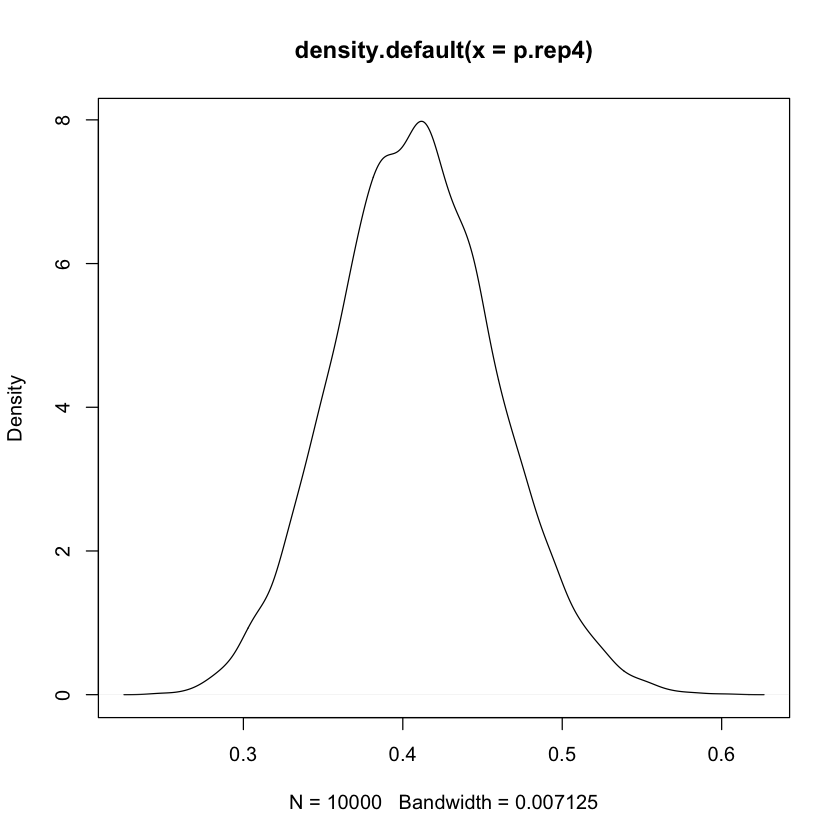

1.000000
0.061000
2.661248
1.000000
0.000000
0.000000
0.000000
0.000000
1.000000
1.000000
41.000000


[1] 15  1

[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.5849291,0.5820924,0.5792039,0.5762639,0.5732730,0.5702316,0.5671401,0.5639992,0.5608093,0.5575712,,0.5509525,0.5475733,0.5441485,0.5406789,0.5371652,0.5336082,0.5300089,0.5263680,0.5226865,0.5189652
0.6151016,0.6221543,0.6291023,0.6359438,0.6426771,0.6493007,0.6558134,0.6622141,0.6685021,0.6746767,,0.6866840,0.6925165,0.6982348,0.7038392,0.7093302,0.7147082,0.7199739,0.7251280,0.7301716,0.7351056
0.6349072,0.6326179,0.6301362,0.6274644,0.6246050,0.6215607,0.6183344,0.6149290,0.6113480,0.6075946,,0.5995854,0.5953372,0.5909320,0.5863739,0.5816674,0.5768168,0.5718269,0.5667022,0.5614477,0.5560682
0.6026923,0.5970030,0.5912631,0.5854740,0.5796370,0.5737535,0.5678251,0.5618534,0.5558400,0.5497866,,0.5375670,0.5314046,0.5252097,0.5189843,0.5127304,0.5064503,0.5001461,0.4938199,0.4874741,0.4811110
0.6072275,0.5936142,0.5798417,0.5659301,0.5519000,0.5377733,0.5235720,0.5093189,0.4950373,0.4807505,,0.4522552,0.4380933,0.4240189,0.4100544,0.3962214,0.3825407,0.3690320,0.3557144,0.3426054,0.3297217
0.6514317,0.6492308,0.6469217,0.6445017,0.6419683,0.6393187,0.6365504,0.6336609,0.6306478,0.6275087,,0.6208433,0.6173128,0.6136478,0.6098465,0.6059072,0.6018283,0.5976087,0.5932471,0.5887426,0.5840945


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.2777370,0.2823482,0.2870034,0.2917021,0.2964436,0.3012273,0.3060525,0.3109185,0.3158245,0.3207698,,0.3307747,0.3358326,0.3409264,0.3460549,0.3512174,0.3564127,0.3616399,0.3668978,0.3721855,0.3775017
0.2648865,0.2573867,0.2500254,0.2428044,0.2357249,0.2287881,0.2219948,0.2153455,0.2088407,0.2024804,,0.1901928,0.1842647,0.1784795,0.1728364,0.1673344,0.1619722,0.1567485,0.1516618,0.1467105,0.1418930
0.2372446,0.2436900,0.2502308,0.2568654,0.2635919,0.2704085,0.2773130,0.2843033,0.2913772,0.2985322,,0.3130751,0.3204576,0.3279104,0.3354305,0.3430147,0.3506599,0.3583627,0.3661199,0.3739279,0.3817831
0.2647269,0.2704251,0.2761972,0.2820422,0.2879589,0.2939462,0.3000027,0.3061269,0.3123175,0.3185728,,0.3312708,0.3377099,0.3442066,0.3507589,0.3573647,0.3640218,0.3707280,0.3774810,0.3842785,0.3911180
0.2855073,0.2967615,0.3082126,0.3198463,0.3316473,0.3435998,0.3556867,0.3678906,0.3801932,0.3925760,,0.4175061,0.4300147,0.4425268,0.4550231,0.4674848,0.4798934,0.4922308,0.5044797,0.5166234,0.5286460
0.2469684,0.2451616,0.2433245,0.2414565,0.2395572,0.2376259,0.2356622,0.2336656,0.2316357,0.2295721,,0.2253424,0.2231757,0.2209742,0.2187378,0.2164662,0.2141595,0.2118178,0.2094411,0.2070296,0.2045836


[1] 0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14
[16] 0.15 0.16 0.17 0.18 0.19 0.20

0.1373338,0.1355594,0.1337927,0.1320340,0.1302834,0.1285411,0.1268074,0.1250823,0.12336618,0.12165908,,0.11827284,0.11659407,0.11492512,0.11326618,0.11161743,0.1099791,0.10835126,0.10673420,0.10512808,0.10353306
0.1200118,0.1204590,0.1208723,0.1212518,0.1215980,0.1219112,0.1221919,0.1224404,0.12265723,0.12284295,,0.12312317,0.12321884,0.12328568,0.12332434,0.12333545,0.1233197,0.12327769,0.12321019,0.12311785,0.12300138
0.1278482,0.1236921,0.1196329,0.1156702,0.1118031,0.1080308,0.1043527,0.1007676,0.09727484,0.09387326,,0.08733954,0.08420519,0.08115761,0.07819561,0.07531794,0.0725233,0.06981041,0.06717791,0.06462444,0.06214863
0.1325808,0.1325719,0.1325397,0.1324838,0.1324041,0.1323003,0.1321722,0.1320197,0.13184254,0.13164065,,0.13116220,0.13088548,0.13058371,0.13025685,0.12990491,0.1295279,0.12912595,0.12869906,0.12824736,0.12777099
0.1072652,0.1096243,0.1119457,0.1142237,0.1164526,0.1186270,0.1207413,0.1227905,0.12476947,0.12667343,,0.13023872,0.13189201,0.13345428,0.13492244,0.13629378,0.1375660,0.13873719,0.13980594,0.14077120,0.14163235
0.1015999,0.1056076,0.1097538,0.1140418,0.1184746,0.1230555,0.1277874,0.1326735,0.13771648,0.14291922,,0.15381426,0.15951141,0.16537791,0.17141573,0.17762663,0.1840121,0.19057354,0.19731184,0.20422779,0.21132184


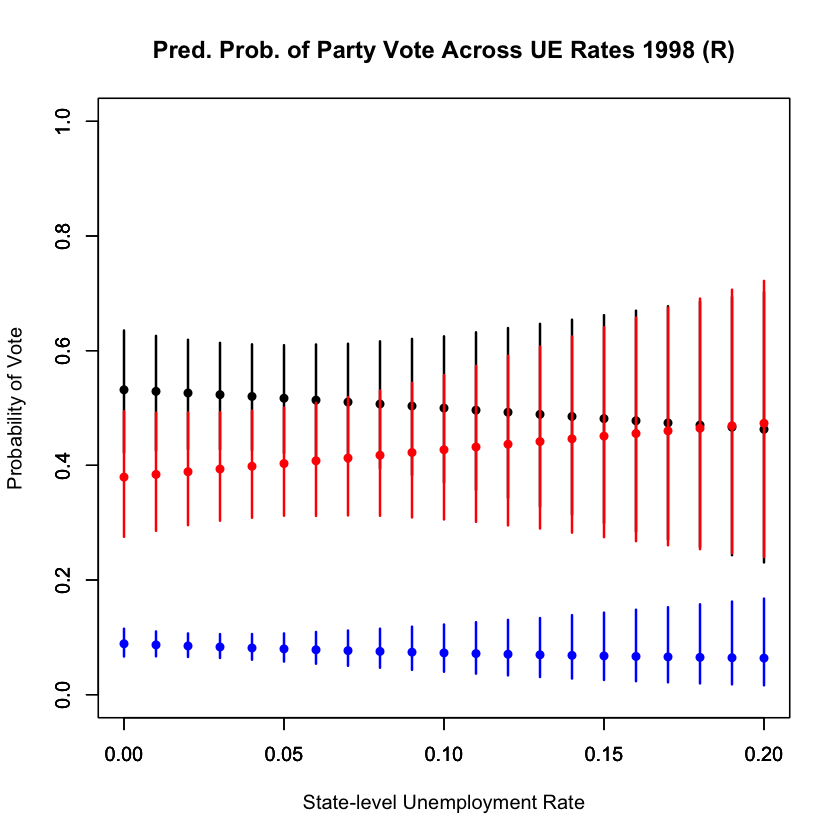

,fips_state,year,age,educ,black,hisp,other,female,married,republican,⋯,unemployed,partyvote,income,incomedk,uerate,state,totalspend,vep,totalspend_voter_inf,pid
1,1,1,77,3,0,0,0,1,1,1,,0,Republican,4,0,0.141,AL,6451471,2780689,2.320098,Rep
3,1,1,27,5,0,0,0,1,0,0,,0,Republican,4,0,0.141,AL,6451471,2780689,2.320098,Dem
4,1,1,42,3,1,0,0,1,0,0,,0,Democrat,3,0,0.141,AL,6451471,2780689,2.320098,Dem
5,1,1,31,4,0,0,0,1,1,0,,1,Democrat,5,0,0.141,AL,6451471,2780689,2.320098,Ind
6,1,1,67,3,0,0,0,1,1,0,,0,Democrat,3,0,0.141,AL,6451471,2780689,2.320098,Dem
7,1,1,54,3,1,0,0,1,0,0,,0,Democrat,2,0,0.141,AL,6451471,2780689,2.320098,Dem


[1] "Ind" "Dem" "Rep"


Call:
mlogit(formula = partyvote ~ 0 | uerate + totalspend_voter_inf + 
    pid + pid:uerate + black + hisp + other + female + married + 
    age + educ + income + unemployed + factor(year), data = anes.data.sh2.ml, 
    reflevel = "Abstain", method = "nr")

Frequencies of alternatives:
   Abstain   Democrat Republican 
   0.49238    0.28307    0.22455 

nr method
6 iterations, 0h:0m:1s 
g'(-H)^-1g = 0.000514 
successive function values within tolerance limits 

Coefficients :
                                   Estimate  Std. Error  z-value  Pr(>|z|)    
Democrat:(intercept)             -4.3154272   0.3802815 -11.3480 < 2.2e-16 ***
Republican:(intercept)           -6.7767073   0.4536521 -14.9381 < 2.2e-16 ***
Democrat:uerate                  -3.0151882   2.7499676  -1.0964 0.2728841    
Republican:uerate                 3.8851687   3.6180465   1.0738 0.2828987    
Democrat:totalspend_voter_inf     0.0733840   0.0185575   3.9544 7.672e-05 ***
Republican:totalspend_voter_inf   0.0692494


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sat, Apr 20, 2019 - 12:39:03
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & partyvote \\ 
\hline \\[-1.8ex] 
 Democrat:(intercept) & $-$4.315$^{***}$ \\ 
  & (0.476) \\ 
  & \\ 
 Republican:(intercept) & $-$6.777$^{***}$ \\ 
  & (0.607) \\ 
  & \\ 
 Democrat:uerate & $-$3.015 \\ 
  & (4.017) \\ 
  & \\ 
 Republican:uerate & 3.885 \\ 
  & (4.715) \\ 
  & \\ 
 Democrat:totalspend\_voter\_inf & 0.073$^{***}$ \\ 
  & (0.026) \\ 
  & \\ 
 Republican:totalspend\_voter\_inf & 0.069 \\ 
  & (0.043) \\ 
  & \\ 
 Democrat:pidInd & $-$1.540$^{***}$ \\ 
  & (0.310) \\ 
  & \\ 
 Republican:pidInd & 0.435 \\ 
  & (0.621) \\ 
  & \\ 
 Democrat:pidRep & $-$1.546$^{***}$ \\ 
  & (0.311) \\ 
  & \\ 
 Republican

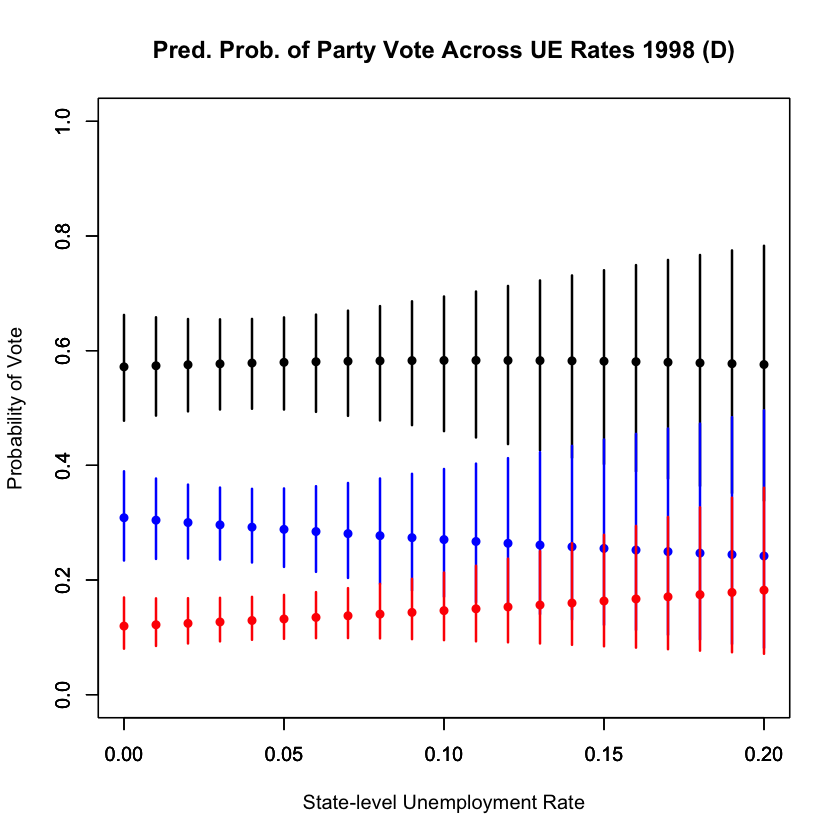

In [12]:
#TABLE 5 - correct coefficients and standard errors (except intercept)

#Convert educ and income variables to numeric
indiv.data1 <- indiv.data
indiv.data1$educ <- as.numeric(indiv.data1$educ)
indiv.data1$income <- as.numeric(indiv.data1$income)

indiv.data.ml <- mlogit.data(indiv.data1, choice="partyvote", shape="wide")

table5 <- mlogit(partyvote ~ 0 | uerate + totalspend_voter_inf + democrat + republican + black + hisp +
                   other + female + married + age + educ + income + incomedk + unemployed + factor(fips_state),
                 data=indiv.data.ml, reflevel="Abstain")
summary(table5)

#SE

#Remove NA's from dataset for SE
indiv.data2 <- na.omit(indiv.data)
nrow(indiv.data2)

cl.mlogit   <- function(fm, cluster){
  require(sandwich, quietly = TRUE)
  require(lmtest, quietly = TRUE)
  M <- length(unique(cluster))
  N <- length(cluster)
  K <- length(coefficients(fm))
  dfc <- (M/(M-1))
  uj  <- apply(estfun(fm),2, function(x) tapply(x, cluster, sum));
  vcovCL <- dfc*sandwich(fm, meat.=crossprod(uj)/N)
  ses <- sqrt(diag(vcovCL))
  coeftest <- coeftest(fm, vcovCL) 
  return(newList <- list("summary" = coeftest, "vcovCL" = vcovCL, "ses" = ses))
}

ses.t51 <- cl.mlogit(table5, indiv.data2$fips_state)



#########################################################################################################
#TABLE 5

#Read in ANES, cut to necessary variables/years and make CSV (reduced CSV included, read in below)

  #anes <- read.dta13("anes_timeseries_cdf_stata12.dta")
  #anes.0 <- data.frame(anes$VCF0004, anes$VCF0101, anes$VCF0110, anes$VCF0901a, anes$VCF0114,
                    #anes$VCF0105b, anes$VCF0104, anes$VCF0147, anes$VCF0303, anes$VCF0116, anes$VCF9025)
  #colnames(anes.0) <- c("VCF0004", "VCF0101", "VCF0110", "VCF0901a", "VCF0114", "VCF0105b",
                      #"VCF0104", "VCF0147", "VCF0303", "VCF0116", "VCF9025")
  #anes.1 <- subset(anes.0, anes$VCF0004 == 1978 | anes$VCF0004 == 1982 | anes$VCF0004 == 1986 |
                    #anes$VCF0004 == 1990 | anes$VCF0004 == 1994 | anes$VCF0004 == 1998) 
  #write.csv(anes.1, "anes-reduced.csv")

anes.2 <- read.csv("anes-reduced.csv")
anes.2 <- anes.2[,-1]
head(anes.2)
#Transform/rename variables
year <- anes.2$VCF0004 
age <- anes.2$VCF0101
educ <- anes.2$VCF0110
fips_state <- anes.2$VCF0901a
income <- anes.2$VCF0114

incomedk <- rep(NA, nrow(anes.2))
for(i in 1:nrow(anes.2)){
  if(anes.2$VCF0114[i] == "0. DK; NA; refused to answer; no Pre IW"){
    incomedk[i] <- 1
  } else{
    incomedk[i] <- 0
  }
}

black <- rep(NA, nrow(anes.2))
for(i in 1:nrow(anes.2)){
  if(anes.2$VCF0105b[i] == "2. Black non-Hispanic"){
    black[i] <- 1
  } else{
    black[i] <- 0
  }
}

hisp <- rep(NA, nrow(anes.2))
for(i in 1:nrow(anes.2)){
  if(anes.2$VCF0105b[i] == "3. Hispanic"){
    hisp[i] <- 1
  } else{
    hisp[i] <- 0
  }
}

other <- rep(NA, nrow(anes.2))
for(i in 1:nrow(anes.2)){
  if(anes.2$VCF0105b[i] == "4. Other or multiple races, non-Hispanic"){
    other[i] <- 1
  } else{
    other[i] <- 0
  }
}

female <- rep(NA, nrow(anes.2))
for(i in 1:nrow(anes.2)){
  if(anes.2$VCF0104[i] == "2. Female"){
    female[i] <- 1
  } else{
    female[i] <- 0
  }
}

married <- rep(NA, nrow(anes.2))
for(i in 1:nrow(anes.2)){
  if(anes.2$VCF0147[i] == "1. Married"){
    married[i] <- 1
  } else{
    married[i] <- 0
  }
}

democrat <- rep(NA, nrow(anes.2))
for(i in 1:nrow(anes.2)){
  if(anes.2$VCF0303[i] == "1. Democrats (including leaners)"){
    democrat[i] <- 1
  } else{
    democrat[i] <- 0
  }
}

republican <- rep(NA, nrow(anes.2))
for(i in 1:nrow(anes.2)){
  if(anes.2$VCF0303[i] == "3. Republicans (including leaners)"){
    republican[i] <- 1
  } else{
    republican[i] <- 0
  }
}


unemployed <- rep(NA, nrow(anes.2))
for(i in 1:nrow(anes.2)){
  if(anes.2$VCF0116[i] == "4. Unemployed"){
    unemployed[i] <- 1
  } else{
    unemployed[i] <- 0
  }
}


partyvote <- as.numeric(anes.2$VCF9025)
partyvote[which(partyvote == 2)] <- "Democrat"
partyvote[which(partyvote == 3)] <- "Republican"
partyvote[which(partyvote == 5)] <- "Abstain"
partyvote[which(partyvote == 1)] <- NA
partyvote[which(partyvote == 4)] <- NA

anes.reduced <- data.frame(year, age, educ, fips_state, black, hisp, other, female, married,
                           republican, democrat, unemployed, partyvote, income, incomedk)

head(anes.reduced)

#Read in unemployment rate data
uerate.bls <- read.csv("uerate-bls.csv")
colnames(uerate.bls) <- c("fips_state", c(1976:2010))
uerate.bls.melt <- melt(uerate.bls, id = "fips_state")
colnames(uerate.bls.melt) <- c("fips_state", "year", "uerate")

#Merge uerate.bls.melt into ANES
anes.reduced.uemerge <- merge(anes.reduced, uerate.bls.melt, by = c("fips_state", "year"))

#Read in campaign expenditures
campaign.spend <- read.csv("CampaignSpend.csv")
campaign.spend <- data.frame(campaign.spend$Year, campaign.spend$State, campaign.spend$X.Spent.2001.)
colnames(campaign.spend) <- c("year", "state", "totalspend")
campaign.spend$state <- as.character(campaign.spend$state)

#Read FIPS state codes (for merge)
states <- read.csv("fips-state.csv")
states$state_abb <- as.character(states$state_abb)

#Add fips_state codes to campaign expenditures
campaign.spend$fips_state <- c()
for(i in 1:nrow(campaign.spend)){
  campaign.spend$fips_state[i] <- states$fips_state[which(states$state_abb == campaign.spend$state[i])]
}

#Add voting eligible population
vep <- read.csv("1980-2014 November General Election - Turnout Rates.csv")

#Add fips_state codes to vep
vep$fips_state <- c()
vep$State[which(vep$State == "United States")] <- NA
vep$State[which(vep$State == "District of Columbia")] <- NA
vep$State[which(vep$State == "United States (Excl. Louisiana)")] <- NA
vep <- vep[which(vep$State != "United States"),]
vep <- vep[which(vep$State != "District of Columbia"),]
vep <- vep[which(vep$State != "United States (Excl. Louisiana)"),]
vep$State <- as.character(vep$State)

for(i in 1:nrow(vep)){
  vep$fips_state[i] <- states$fips_state[which(states$state == vep$State[i])]
}

vep1 <- data.frame(vep$fips_state, vep$Year, vep$Voting.Eligible.Population..VEP.)
colnames(vep1) <- c("fips_state", "year", "vep")

#Merge vep to campaign expenditures
campaign.spend.vep <- merge(campaign.spend, vep1, by = c("fips_state", "year"))

#Divide totalspend by vep
campaign.spend.vep$totalspend_voter_inf <- campaign.spend.vep$totalspend/campaign.spend.vep$vep

#Merge campaign expenditures with ANES
anes.reduced.camp.merge <- merge(anes.reduced.uemerge, campaign.spend.vep, by = c("fips_state", "year"))

#Replicate Table 5 with new dataset/remove 1994
anes.data <- subset(anes.reduced.camp.merge, anes.reduced.camp.merge$year != "1994")

#Cleaning
anes.data$totalspend_voter_inf <- as.numeric(anes.data$totalspend_voter_inf)
anes.data$age[which(anes.data$age == 0)] <- NA
anes.data$educ[which(anes.data$educ == "0. DK; NA; no Pre IW; short-form 'new' Cross Section")] <- NA
anes.data$income[which(anes.data$income == "0. DK; NA; refused to answer; no Pre IW")] <- NA
anes.data$incomedk <- as.numeric(anes.data$incomedk)
anes.data$uerate <- anes.data$uerate/100

#Remove NA's from dataset for robust SE function and set educ/income as numeric
anes.data2 <- na.omit(anes.data)
anes.data$educ <- as.numeric(anes.data$educ)
anes.data$income <- as.numeric(anes.data$income)
anes.data.ml <- mlogit.data(anes.data, choice="partyvote", shape="wide")

#Run multinomial logit as close to Table 5 model as possible
table5.anes <- mlogit(partyvote ~ 0 | uerate + totalspend_voter_inf + democrat + republican + black + hisp +
                        other + female + married + age + educ + income + unemployed + factor(fips_state),
                      data=anes.data.ml, reflevel="Abstain")
summary(table5.anes)

ses.t5a <- cl.mlogit(table5.anes, anes.data2$fips_state)

#Model with year fixed effects
table5.anes1 <- mlogit(partyvote ~ 0 | uerate + totalspend_voter_inf + democrat + republican + black + hisp +
                         other + female + married + age + educ + income + unemployed + factor(year),
                       data=anes.data.ml, reflevel="Abstain")
summary(table5.anes1)
ses.t5a1 <- cl.mlogit(table5.anes1, anes.data2$fips_state)

#Compare Table 5, model from Table 5 using our data, and replacing state with year fixed effects in model
stargazer(table5, table5.anes, table5.anes1, se=list(ses.t51$ses, ses.t5a$ses, ses.t5a1$ses))

#########################################################################################
#Add in incumbency Variables
incumbent <- read.csv("incumbent.csv")
incumbent$Area <- as.character(incumbent$Area)
states$state <- as.character(states$state)
incumbent$year <- incumbent$raceYear

#Add fips_state codes to incumbent
incumbent$fips_state <- c()
for(i in 1:nrow(incumbent)){
  incumbent$fips_state[i] <- states$fips_state[which(states$state == incumbent$Area[i])]
}

#Create binary indicator for incumbent for each party
incumbent$RepInc[incumbent$RepStatus == "Incumbent"] <- 1
incumbent$RepInc[incumbent$RepStatus == "Challenger"] <- 0
incumbent$DemInc[incumbent$DemStatus == "Incumbent"] <- 1
incumbent$DemInc[incumbent$DemStatus == "Challenger"] <- 0

#Reduce to needed columns
incumbent <- data.frame(incumbent$year, incumbent$fips_state, incumbent$RepInc, incumbent$DemInc)
colnames(incumbent) <- c("year", "fips_state", "rep_status", "dem_status")

#Merge incumbent with ANES
anes.inc <- merge(anes.data, incumbent, by = c("fips_state", "year"))
nrow(anes.inc)

anes.inc.ml <- mlogit.data(anes.inc, choice="partyvote", shape="wide")

#Multinomial logit with incumbency control and year fixed effects
table5.anes.inc2 <- mlogit(partyvote ~ 0 | uerate + totalspend_voter_inf + democrat + republican + black + hisp +
                             other + female + married + age + educ + income + unemployed + factor(year)
                           + rep_status + dem_status,
                           data=anes.inc.ml, reflevel="Abstain")
summary(table5.anes.inc2)
anes.inc2 <- na.omit(anes.inc)
ses.t5ai <- cl.mlogit(table5.anes.inc2, anes.inc2$fips_state)

#Compare to model without incumbency control
stargazer(table5.anes1, table5.anes.inc2, se=list(ses.t5a1$ses, ses.t5ai$ses))
########################################################################################################################
#calculating predicted probabilities across diff values of uerate - using authors' original model from paper 
#Table 5, multnomial logit with state FEs and clustered SEs at state level


#running clustered SE function with table 5 - calculating simulated betas with clustered vcov object
require(mlogit)

indiv.data1 <- indiv.data
indiv.data1$educ <- as.numeric(indiv.data1$educ)
indiv.data1$income <- as.numeric(indiv.data1$income)
head(indiv.data1)
indiv.data.ml <- mlogit.data(indiv.data1, choice="partyvote", shape="wide")
head(indiv.data.ml)

logit3 <- mlogit(partyvote ~ 0 | uerate + totalspend_voter_inf + democrat + republican + black + hisp +
                   other + female + married + age + income + educ + incomedk + unemployed + factor(fips_state), 
                 data=indiv.data.ml, reflevel = "Abstain")
summary(logit3)


#SE - getting clustered SE vcov matrix 

#Remove NA's from dataset for SE function
indiv.data1 <- na.omit(indiv.data1)
nrow(indiv.data1)


require(sandwich, quietly = TRUE)
require(lmtest, quietly = TRUE)

# setting cluster to correct variable

cluster <- indiv.data1$fips_state

M <- length(unique(cluster))
N <- length(cluster)
K <- length(coefficients(logit3))
dfc <- (M/(M-1))
uj  <- apply(estfun(logit3),2, function(x) tapply(x, cluster, sum));
vcovCL <- dfc*sandwich(logit3, meat.=crossprod(uj)/N)
coeftest(logit3, vcovCL)

cov.mat <- vcovCL
dim(cov.mat)


#generating betas 

require(MASS)
sim.betas <- mvrnorm(10000, as.vector(coef(logit3)), cov.mat)
dim(sim.betas)
head(sim.betas)

#splitting Dem and Rep betas for each covariate - want 16 in each vector, the last beta for each vector is the 
#coefficient for the state of interest (in our case, Michigan (fips code = 26))
dem.betas <- sim.betas[, c(1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 57)] #16 covs
rep.betas <- sim.betas[, c(2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 58)] #16 covs
dim(dem.betas)
dim(rep.betas)
#both 10000 x 16 - good, what we want


#making vector of covariates held at median - making voter republican 
#keeping fips_state at 1 bc we've set the covariate above to that of MI
head(sim.betas)
voter1 <- with(indiv.data1, c(uerate = median(uerate), totalspend_voter_inf = median(totalspend_voter_inf), democrat = 0, republican = 1, 
                              black = median(black), hisp = median(hisp), other = median(other), female = median(female), married = median(married),
                              age = median(age), income = median(income), educ = median(educ), incomedk = median(incomedk), 
                              uemployed = median(unemployed), fips_state = 1))


voter1 <- as.matrix(as.numeric(c(1, voter1)))
#binding a 1 to our voter1 vector for intercept
voter1
dim(voter1)
#16 x 1 - good

#equations for predicted probs 

p.abstain <- 1/(exp(t(voter1)%*%t(dem.betas)) + exp(t(voter1)%*%t(rep.betas)) + 1)
p.dem <- exp(t(voter1)%*%t(dem.betas))/(exp(t(voter1)%*%t(dem.betas)) + exp(t(voter1)%*%t(rep.betas)) + 1)
p.rep <- exp(t(voter1)%*%t(rep.betas))/(exp(t(voter1)%*%t(dem.betas)) + exp(t(voter1)%*%t(rep.betas)) + 1)

p.abstain
mean(p.abstain)
p.dem
mean(p.dem)
p.rep
mean(p.rep)

plot(density(p.rep))


#calculating predicted probabilities for Abstaining for Republican voter (MI)
ue.vals <- seq(0, .2, .01)
ue.vals
p.abstain.rep <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  voter1.new <- voter1
  voter1.new[2] <- ue.vals[i]
  p.abstain.rep[,i] <- 1/(exp(t(voter1.new)%*%t(dem.betas)) + exp(t(voter1.new)%*%t(rep.betas)) + 1)
}

head(p.abstain.rep)


#calculating predicted probabilities for Democrat vote

ue.vals <- seq(0, .2, .01)
ue.vals
p.dem.rep <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  voter1.new <- voter1
  voter1.new[2] <- ue.vals[i]
  p.dem.rep[,i] <- exp(t(voter1.new)%*%t(dem.betas))/(exp(t(voter1.new)%*%t(dem.betas)) + exp(t(voter1.new)%*%t(rep.betas)) + 1)
}

head(p.dem.rep)


#calculating predicted probabilities for voting for a Republican 

ue.vals <- seq(0, .2, .01)
ue.vals
p.rep.rep <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  voter1.new <- voter1
  voter1.new[2] <- ue.vals[i]
  p.rep.rep[,i] <- exp(t(voter1.new)%*%t(rep.betas))/(exp(t(voter1.new)%*%t(dem.betas)) + exp(t(voter1.new)%*%t(rep.betas)) + 1)
}

head(p.rep.rep)


#combined plot of pred probs for partyvote, across uerate, for Republican voter 


plot(ue.vals, apply(p.abstain.rep,2,mean), ylim=c(0,1), main = "Pred. Prob. of Party Vote Across UE Rates (R)", type = 'p', pch = 16, ylab = "Probability of Vote", xlab = "State-level Unemployment Rate")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.abstain.rep, 2, quantile, .025),
         y1 = apply(p.abstain.rep, 2, quantile, .975), lwd = 2)
par(new = TRUE)
plot(ue.vals, apply(p.dem.rep,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Blue")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.dem.rep, 2, quantile, .025),
         y1 = apply(p.dem.rep, 2, quantile, .975), lwd = 2, col = "Blue")
par(new = TRUE)
plot(ue.vals, apply(p.rep.rep,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Red")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.rep.rep, 2, quantile, .025),
         y1 = apply(p.rep.rep, 2, quantile, .975), lwd = 2, col = "Red")


#doing same thing - calculating predicted probs for Democratic voter (MI)

voter2 <- with(indiv.data1, c(uerate = median(uerate), totalspend_voter_inf = median(totalspend_voter_inf), democrat = 1, republican = 0, 
                              black = median(black), hisp = median(hisp), other = median(other), female = median(female), married = median(married),
                              age = median(age), income = median(income), educ = median(educ), incomedk = median(incomedk), 
                              uemployed = median(unemployed), fips_state = 1))


voter2 <- as.matrix(as.numeric(c(1, voter2)))

voter2
dim(voter2)

#calculating predicted probabilities for Abstaining (will do separate graphs for each level of party vote)
ue.vals <- seq(0, .2, .01)
ue.vals
p.abstain.dem <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  voter2.new <- voter2
  voter2.new[2] <- ue.vals[i]
  p.abstain.dem[,i] <- 1/(exp(t(voter2.new)%*%t(dem.betas)) + exp(t(voter2.new)%*%t(rep.betas)) + 1)
}

head(p.abstain.dem)

#calculating predicted probabilities for Democrat vote

ue.vals <- seq(0, .2, .01)
ue.vals
p.dem.dem <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  voter2.new <- voter2
  voter2.new[2] <- ue.vals[i]
  p.dem.dem[,i] <- exp(t(voter2.new)%*%t(dem.betas))/(exp(t(voter2.new)%*%t(dem.betas)) + exp(t(voter2.new)%*%t(rep.betas)) + 1)
}

head(p.dem.dem)

#calculating predicted probabilities for voting for a Republican 

ue.vals <- seq(0, .2, .01)
ue.vals
p.rep.dem <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  voter2.new <- voter2
  voter2.new[2] <- ue.vals[i]
  p.rep.dem[,i] <- exp(t(voter2.new)%*%t(rep.betas))/(exp(t(voter2.new)%*%t(dem.betas)) + exp(t(voter2.new)%*%t(rep.betas)) + 1)
}

head(p.rep.dem)


#combining plots for Dem voter

plot(ue.vals, apply(p.abstain.dem,2,mean), ylim=c(0,1), main = "Pred. Prob. of Party Vote Across UE Rate (D)", type = 'p', pch = 16, ylab = "Probability of Vote", xlab = "State-level Unemployment Rate")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.abstain.dem, 2, quantile, .025),
         y1 = apply(p.abstain.dem, 2, quantile, .975), lwd = 2)
par(new = TRUE)
plot(ue.vals, apply(p.dem.dem,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Blue")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.dem.dem, 2, quantile, .025),
         y1 = apply(p.dem.dem, 2, quantile, .975), lwd = 2, col = "Blue")
par(new = TRUE)
plot(ue.vals, apply(p.rep.dem,2,mean), ylim=c(0,1), type = 'p', pch = 16, col = "Red", ann = FALSE)
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.rep.dem, 2, quantile, .025),
         y1 = apply(p.rep.dem, 2, quantile, .975), lwd = 2, col = "Red")



####################################################################################################################
#running logit model without 1994 - totalspend_voter_inf is our variable
#removed state FEs and replaced with year FEs (1982, 1986, 1990, 1998)
#clustered SEs at fips_state level

anes.data.sh <- subset(anes.data, anes.data$year != "1994")
anes.data.sh.ml <- mlogit.data(anes.data.sh, choice="partyvote", shape="wide")

table5.anes.sh <- mlogit(partyvote ~ 0 | uerate + totalspend_voter_inf + democrat + republican + black + hisp +
                         other + female + married + age + educ + income + unemployed + factor(year),
                       data=anes.data.sh.ml, reflevel="Abstain")
summary(table5.anes.sh)
anes.data.sh <- na.omit(anes.data.sh)
require(sandwich, quietly = TRUE)
require(lmtest, quietly = TRUE)

# setting cluster to correct variable

cluster <- anes.data.sh$fips_state

M <- length(unique(cluster))
N <- length(cluster)
K <- length(coefficients(table5.anes.sh))
dfc <- (M/(M-1))
uj  <- apply(estfun(table5.anes.sh),2, function(x) tapply(x, cluster, sum));
vcovCL2 <- dfc*sandwich(table5.anes.sh, meat.=crossprod(uj)/N)
coeftest(table5.anes.sh, vcovCL2)

cov.mat2 <- vcovCL2
dim(cov.mat2)
#saved var-cov matrix to be used in sim betas 


head(anes.data.sh)
#vector of covariate values for reference voter - will this work with factored vars? what to do with year?
table(anes.data.sh$year)
anes.data.sh$year[anes.data.sh$year == "1982"] <- 1
anes.data.sh$year[anes.data.sh$year == "1986"] <- 2
anes.data.sh$year[anes.data.sh$year == "1990"] <- 3
anes.data.sh$year[anes.data.sh$year == "1998"] <- 4
median(anes.data.sh$year)
#median is 1986

#predicted probabiltiies for year = 1986 (2) - Republican voter
v1 <- with(anes.data.sh, c(uerate = median(uerate), totalspend_voter_inf = median(totalspend_voter_inf), democrat = 0, republican = 1, 
                         black = median(black), hisp = median(hisp), other = median(other), female = median(female), married = median(married),
                         age = median(age), educ = median(educ), income = median(income), uemployed = median(unemployed),
                         year = 1))


v1 <- as.matrix(as.numeric(c(1, v1)))

v1
dim(v1)



#simulating betas using coefs from logit and ses from clustered logit model

require(MASS)
sim.betas2 <- mvrnorm(10000, as.vector(coef(table5.anes.sh)), cov.mat2)
dim(sim.betas2)
head(sim.betas2)


#splitting Dem and Rep betas for simulation - 29 and 30 are coefs for 1986 -
#will have to change when looking at other years 

dem.betas2 <- sim.betas2[, c(1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29)] #15 covs
rep.betas2 <- sim.betas2[, c(2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30)] #15 covs
dim(dem.betas2)
dim(rep.betas2)

#equations for predicted probabilities
p.abstain2 <- 1/(exp(t(v1)%*%t(dem.betas2)) + exp(t(v1)%*%t(rep.betas2)) + 1)
p.dem2 <- exp(t(v1)%*%t(dem.betas2))/(exp(t(v1)%*%t(dem.betas2)) + exp(t(v1)%*%t(rep.betas2)) + 1)
p.rep2 <- exp(t(v1)%*%t(rep.betas2))/(exp(t(v1)%*%t(dem.betas2)) + exp(t(v1)%*%t(rep.betas2)) + 1)

p.abstain2
mean(p.abstain2)
p.dem2
mean(p.dem2)
p.rep2
mean(p.rep2)

#check distribution of probabiltiies for each outcome level
plot(density(p.rep2))

#########################################################################################################
#calculating predicted probabilties for each level of partyvote for Rep voter in 1986 (v1)

ue.vals <- seq(0, .2, .01)
ue.vals
p.abstain.rep2 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v1.new <- v1
  v1.new[2] <- ue.vals[i]
  p.abstain.rep2[,i] <- 1/(exp(t(v1.new)%*%t(dem.betas2)) + exp(t(v1.new)%*%t(rep.betas2)) + 1)
}

head(p.abstain.rep2)


#calculating predicted probabilities for Democrat vote

ue.vals <- seq(0, .2, .01)
ue.vals
p.dem.rep2 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v1.new <- v1
  v1.new[2] <- ue.vals[i]
  p.dem.rep2[,i] <- exp(t(v1.new)%*%t(dem.betas2))/(exp(t(v1.new)%*%t(dem.betas2)) + exp(t(v1.new)%*%t(rep.betas2)) + 1)
}

head(p.dem.rep2)


#calculating predicted probabilities for voting for a Republican 

ue.vals <- seq(0, .2, .01)
ue.vals
p.rep.rep2 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v1.new <- v1
  v1.new[2] <- ue.vals[i]
  p.rep.rep2[,i] <- exp(t(v1.new)%*%t(rep.betas2))/(exp(t(v1.new)%*%t(dem.betas2)) + exp(t(v1.new)%*%t(rep.betas2)) + 1)
}

head(p.rep.rep2)


#combined plot of pred probs for partyvote, across uerate, for Republican voter (year = 1986)


plot(ue.vals, apply(p.abstain.rep2,2,mean), ylim=c(0,1), main = "Pred. Prob. of Party Vote Across UE Rate 1986 (R)", type = 'p', pch = 16, ylab = "Probability of Vote", xlab = "State-level Unemployment Rate")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.abstain.rep2, 2, quantile, .025),
         y1 = apply(p.abstain.rep2, 2, quantile, .975), lwd = 2)
par(new = TRUE)
plot(ue.vals, apply(p.dem.rep2,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Blue")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.dem.rep2, 2, quantile, .025),
         y1 = apply(p.dem.rep2, 2, quantile, .975), lwd = 2, col = "Blue")
par(new = TRUE)
plot(ue.vals, apply(p.rep.rep2,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Red")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.rep.rep2, 2, quantile, .025),
         y1 = apply(p.rep.rep2, 2, quantile, .975), lwd = 2, col = "Red")


##########################################################################################################
#same thing for Democratic voter (year = 1986 = 2)

v2 <- with(anes.data.sh, c(uerate = median(uerate), totalspend_voter_inf = median(totalspend_voter_inf), democrat = 1, republican = 0, 
                         black = median(black), hisp = median(hisp), other = median(other), female = median(female), married = median(married),
                         age = median(age), educ = median(educ), income = median(income), uemployed = median(unemployed),
                         year = 1))


v2 <- as.matrix(as.numeric(c(1, v2)))

v2
dim(v2)

#calculating predicted probabilities for Abstaining 
ue.vals <- seq(0, .2, .01)
ue.vals
p.abstain.dem2 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v2.new <- v2
  v2.new[2] <- ue.vals[i]
  p.abstain.dem2[,i] <- 1/(exp(t(v2.new)%*%t(dem.betas2)) + exp(t(v2.new)%*%t(rep.betas2)) + 1)
}

head(p.abstain.dem2)


#calculating predicted probabilities for Democrat vote

ue.vals <- seq(0, .2, .01)
ue.vals
p.dem.dem2 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v2.new <- v2
  v2.new[2] <- ue.vals[i]
  p.dem.dem2[,i] <- exp(t(v2.new)%*%t(dem.betas2))/(exp(t(v2.new)%*%t(dem.betas2)) + exp(t(v2.new)%*%t(rep.betas2)) + 1)
}

head(p.dem.dem2)


#calculating predicted probabilities for voting for a Republican 

ue.vals <- seq(0, .2, .01)
ue.vals
p.rep.dem2 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v2.new <- v2
  v2.new[2] <- ue.vals[i]
  p.rep.dem2[,i] <- exp(t(v2.new)%*%t(rep.betas2))/(exp(t(v2.new)%*%t(dem.betas2)) + exp(t(v2.new)%*%t(rep.betas2)) + 1)
}

head(p.rep.dem2)


#combined plot of pred probs for partyvote, across uerate, for Democratic voter, year = 1986

plot(ue.vals, apply(p.abstain.dem2,2,mean), ylim=c(0,1), main = "Pred. Prob. of Party Vote Across UE Rate 1986 (D)", type = 'p', pch = 16, ylab = "Probability of Vote", xlab = "State-level Unemployment Rate")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.abstain.dem2, 2, quantile, .025),
         y1 = apply(p.abstain.dem2, 2, quantile, .975), lwd = 2)
par(new = TRUE)
plot(ue.vals, apply(p.dem.dem2,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Blue")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.dem.dem2, 2, quantile, .025),
         y1 = apply(p.dem.dem2, 2, quantile, .975), lwd = 2, col = "Blue")
par(new = TRUE)
plot(ue.vals, apply(p.rep.dem2,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Red")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.rep.dem2, 2, quantile, .025),
         y1 = apply(p.rep.dem2, 2, quantile, .975), lwd = 2, col = "Red")


##############################################################################################################################
#repeating steps for 1990 (year = 3) - Rep voter first 

#splitting Dem and Rep betas for simulation - 31 and 32 are coefs for 1990 

dem.betas3 <- sim.betas2[, c(1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 31)] #15 covs
rep.betas3 <- sim.betas2[, c(2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 32)] #15 covs
dim(dem.betas3)
dim(rep.betas3)



v3 <- with(anes.data.sh, c(uerate = median(uerate), totalspend_voter_inf = median(totalspend_voter_inf), democrat = 0, republican = 1, 
                         black = median(black), hisp = median(hisp), other = median(other), female = median(female), married = median(married),
                         age = median(age), educ = median(educ), income = median(income), uemployed = median(unemployed),
                         year = 1))

v3 <- as.matrix(as.numeric(c(1, v3)))

v3
dim(v3)

#equations for predicted probabilities
p.abstain3 <- 1/(exp(t(v3)%*%t(dem.betas3)) + exp(t(v3)%*%t(rep.betas3)) + 1)
p.dem3 <- exp(t(v3)%*%t(dem.betas3))/(exp(t(v3)%*%t(dem.betas3)) + exp(t(v3)%*%t(rep.betas3)) + 1)
p.rep3 <- exp(t(v3)%*%t(rep.betas3))/(exp(t(v3)%*%t(dem.betas3)) + exp(t(v3)%*%t(rep.betas3)) + 1)

p.abstain3
mean(p.abstain3)
p.dem3
mean(p.dem3)
p.rep3
mean(p.rep3)

#check distribution of probabiltiies for each outcome level
plot(density(p.abstain3))

#########################################################################################################
#calculating predicted probabilties for each level of partyvote for Rep voter in 1990 

ue.vals <- seq(0, .2, .01)
ue.vals
p.abstain.rep3 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v3.new <- v3
  v3.new[2] <- ue.vals[i]
  p.abstain.rep3[,i] <- 1/(exp(t(v3.new)%*%t(dem.betas3)) + exp(t(v3.new)%*%t(rep.betas3)) + 1)
}

head(p.abstain.rep3)


#calculating predicted probabilities for Democrat vote

ue.vals <- seq(0, .2, .01)
ue.vals
p.dem.rep3 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v3.new <- v3
  v3.new[2] <- ue.vals[i]
  p.dem.rep3[,i] <- exp(t(v3.new)%*%t(dem.betas3))/(exp(t(v3.new)%*%t(dem.betas3)) + exp(t(v3.new)%*%t(rep.betas3)) + 1)
}

head(p.dem.rep3)


#calculating predicted probabilities for voting for a Republican 

ue.vals <- seq(0, .2, .01)
ue.vals
p.rep.rep3 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v3.new <- v3
  v3.new[2] <- ue.vals[i]
  p.rep.rep3[,i] <- exp(t(v3.new)%*%t(rep.betas3))/(exp(t(v3.new)%*%t(dem.betas3)) + exp(t(v3.new)%*%t(rep.betas3)) + 1)
}

head(p.rep.rep3)


#combined plot of pred probs for partyvote, across uerate, for Republican voter (year = 1990)


plot(ue.vals, apply(p.abstain.rep3,2,mean), ylim=c(0,1), main = "Pred. Prob. of Party Vote Across UE Rate 1990 (R)", type = 'p', pch = 16, ylab = "Probability of Vote", xlab = "State-level Unemployment Rate")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.abstain.rep3, 2, quantile, .025),
         y1 = apply(p.abstain.rep3, 2, quantile, .975), lwd = 2)
par(new = TRUE)
plot(ue.vals, apply(p.dem.rep3,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Blue")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.dem.rep3, 2, quantile, .025),
         y1 = apply(p.dem.rep3, 2, quantile, .975), lwd = 2, col = "Blue")
par(new = TRUE)
plot(ue.vals, apply(p.rep.rep3,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Red")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.rep.rep3, 2, quantile, .025),
         y1 = apply(p.rep.rep3, 2, quantile, .975), lwd = 2, col = "Red")


######################################################################################################
#predicted probabilities for Democratic voter, year = 1990 (3)


v4 <- with(anes.data.sh, c(uerate = median(uerate), totalspend_voter_inf = median(totalspend_voter_inf), democrat = 1, republican = 0, 
                           black = median(black), hisp = median(hisp), other = median(other), female = median(female), married = median(married),
                           age = median(age), educ = median(educ), income = median(income), uemployed = median(unemployed),
                           year = 1))

v4 <- as.matrix(as.numeric(c(1, v4)))

v4
dim(v4)

########################################################################################################
#calculating predicted probabitliies 
ue.vals <- seq(0, .2, .01)
ue.vals
p.abstain.dem3 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v4.new <- v4
  v4.new[2] <- ue.vals[i]
  p.abstain.dem3[,i] <- 1/(exp(t(v4.new)%*%t(dem.betas3)) + exp(t(v4.new)%*%t(rep.betas3)) + 1)
}

head(p.abstain.dem3)


#calculating predicted probabilities for Democrat vote

ue.vals <- seq(0, .2, .01)
ue.vals
p.dem.dem3 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v4.new <- v4
  v4.new[2] <- ue.vals[i]
  p.dem.dem3[,i] <- exp(t(v4.new)%*%t(dem.betas3))/(exp(t(v4.new)%*%t(dem.betas3)) + exp(t(v4.new)%*%t(rep.betas3)) + 1)
}

head(p.dem.dem3)


#calculating predicted probabilities for voting for a Republican 

ue.vals <- seq(0, .2, .01)
ue.vals
p.rep.dem3 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v4.new <- v4
  v4.new[2] <- ue.vals[i]
  p.rep.dem3[,i] <- exp(t(v4.new)%*%t(rep.betas3))/(exp(t(v4.new)%*%t(dem.betas3)) + exp(t(v4.new)%*%t(rep.betas3)) + 1)
}

head(p.rep.dem3)


#combined plot of pred probs for partyvote, across uerate, for Democratic voter (year = 1990)


plot(ue.vals, apply(p.abstain.dem3,2,mean), ylim=c(0,1), main = "Pred. Prob. of Party Vote Across UE Rates 1990 (D)", type = 'p', pch = 16, ylab = "Probability of Vote", xlab = "State-level Unemployment Rate")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.abstain.dem3, 2, quantile, .025),
         y1 = apply(p.abstain.dem3, 2, quantile, .975), lwd = 2)
par(new = TRUE)
plot(ue.vals, apply(p.dem.dem3,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Blue")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.dem.dem3, 2, quantile, .025),
         y1 = apply(p.dem.dem3, 2, quantile, .975), lwd = 2, col = "Blue")
par(new = TRUE)
plot(ue.vals, apply(p.rep.dem3,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Red")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.rep.dem3, 2, quantile, .025),
         y1 = apply(p.rep.dem3, 2, quantile, .975), lwd = 2, col = "Red")


########################################################################################################
#Same thing for year = 1998 - calculating predicted probabilities partyvote outcomes


#splitting Dem and Rep betas for simulation - 31 and 32 are coefs for 1998

dem.betas4 <- sim.betas2[, c(1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 33)] #15 covs
rep.betas4 <- sim.betas2[, c(2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 34)] #15 covs
dim(dem.betas4)
dim(rep.betas4)

#starting with Republican voter (year = 1998 = 4)

v5 <- with(anes.data.sh, c(uerate = median(uerate), totalspend_voter_inf = median(totalspend_voter_inf), democrat = 0, republican = 1, 
                           black = median(black), hisp = median(hisp), other = median(other), female = median(female), married = median(married),
                           age = median(age), educ = median(educ), income = median(income), uemployed = median(unemployed),
                           year = 1))

v5 <- as.matrix(as.numeric(c(1, v5)))

v5
dim(v5)

#equations for predicted probabilities
p.abstain4 <- 1/(exp(t(v5)%*%t(dem.betas4)) + exp(t(v5)%*%t(rep.betas4)) + 1)
p.dem4 <- exp(t(v5)%*%t(dem.betas4))/(exp(t(v5)%*%t(dem.betas4)) + exp(t(v5)%*%t(rep.betas4)) + 1)
p.rep4 <- exp(t(v5)%*%t(rep.betas4))/(exp(t(v5)%*%t(dem.betas4)) + exp(t(v5)%*%t(rep.betas4)) + 1)

p.abstain4
mean(p.abstain4)
p.dem4
mean(p.dem4)
p.rep4
mean(p.rep4)

#check distribution of probabiltiies for each outcome level
plot(density(p.rep4))

#########################################################################################################
#calculating predicted probabilties for each level of partyvote for Rep voter in 1990 

ue.vals <- seq(0, .2, .01)
ue.vals
p.abstain.rep4 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v5.new <- v5
  v5.new[2] <- ue.vals[i]
  p.abstain.rep4[,i] <- 1/(exp(t(v5.new)%*%t(dem.betas4)) + exp(t(v5.new)%*%t(rep.betas4)) + 1)
}

head(p.abstain.rep4)


#calculating predicted probabilities for Democrat vote

ue.vals <- seq(0, .2, .01)
ue.vals
p.dem.rep4 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v5.new <- v5
  v5.new[2] <- ue.vals[i]
  p.dem.rep4[,i] <- exp(t(v5.new)%*%t(dem.betas4))/(exp(t(v5.new)%*%t(dem.betas4)) + exp(t(v5.new)%*%t(rep.betas4)) + 1)
}

head(p.dem.rep4)


#calculating predicted probabilities for voting for a Republican 

ue.vals <- seq(0, .2, .01)
ue.vals
p.rep.rep4 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v5.new <- v5
  v5.new[2] <- ue.vals[i]
  p.rep.rep4[,i] <- exp(t(v5.new)%*%t(rep.betas4))/(exp(t(v5.new)%*%t(dem.betas4)) + exp(t(v5.new)%*%t(rep.betas4)) + 1)
}

head(p.rep.rep4)


#combined plot of pred probs for partyvote, across uerate, for Republican voter (year = 1990)


plot(ue.vals, apply(p.abstain.rep4,2,mean), ylim=c(0,1), main = "Pred. Prob. of Party Vote Across UE Rates 1998 (R)", type = 'p', pch = 16, ylab = "Probability of Vote", xlab = "State-level Unemployment Rate")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.abstain.rep4, 2, quantile, .025),
         y1 = apply(p.abstain.rep4, 2, quantile, .975), lwd = 2)
par(new = TRUE)
plot(ue.vals, apply(p.dem.rep4,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Blue")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.dem.rep4, 2, quantile, .025),
         y1 = apply(p.dem.rep4, 2, quantile, .975), lwd = 2, col = "Blue")
par(new = TRUE)
plot(ue.vals, apply(p.rep.rep4,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Red")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.rep.rep4, 2, quantile, .025),
         y1 = apply(p.rep.rep4, 2, quantile, .975), lwd = 2, col = "Red")


######################################################################################################
#predicted probabilities for Democratic voter, year = 1998 (4)


v6 <- with(anes.data.sh, c(uerate = median(uerate), totalspend_voter_inf = median(totalspend_voter_inf), democrat = 1, republican = 0, 
                           black = median(black), hisp = median(hisp), other = median(other), female = median(female), married = median(married),
                           age = median(age), educ = median(educ), income = median(income), uemployed = median(unemployed),
                           year = 1))

v6 <- as.matrix(as.numeric(c(1, v6)))

v6
dim(v6)

########################################################################################################
#calculating predicted probabitliies 
ue.vals <- seq(0, .2, .01)
ue.vals
p.abstain.dem4 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v6.new <- v6
  v6.new[2] <- ue.vals[i]
  p.abstain.dem4[,i] <- 1/(exp(t(v6.new)%*%t(dem.betas4)) + exp(t(v6.new)%*%t(rep.betas4)) + 1)
}

head(p.abstain.dem4)


#calculating predicted probabilities for Democrat vote

ue.vals <- seq(0, .2, .01)
ue.vals
p.dem.dem4 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v6.new <- v6
  v6.new[2] <- ue.vals[i]
  p.dem.dem4[,i] <- exp(t(v6.new)%*%t(dem.betas4))/(exp(t(v6.new)%*%t(dem.betas4)) + exp(t(v6.new)%*%t(rep.betas4)) + 1)
}

head(p.dem.dem4)


#calculating predicted probabilities for voting for a Republican 

ue.vals <- seq(0, .2, .01)
ue.vals
p.rep.dem4 <- matrix(data = NA, ncol= length(ue.vals), nrow = 10000)

for(i in 1:length(ue.vals)){
  v6.new <- v6
  v6.new[2] <- ue.vals[i]
  p.rep.dem4[,i] <- exp(t(v6.new)%*%t(rep.betas4))/(exp(t(v6.new)%*%t(dem.betas4)) + exp(t(v6.new)%*%t(rep.betas4)) + 1)
}

head(p.rep.dem4)


#combined plot of pred probs for partyvote, across uerate, for Democratic voter (year = 1990)


plot(ue.vals, apply(p.abstain.dem4,2,mean), ylim=c(0,1), main = "Pred. Prob. of Party Vote Across UE Rates 1998 (D)", type = 'p', pch = 16, ylab = "Probability of Vote", xlab = "State-level Unemployment Rate")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.abstain.dem4, 2, quantile, .025),
         y1 = apply(p.abstain.dem4, 2, quantile, .975), lwd = 2)
par(new = TRUE)
plot(ue.vals, apply(p.dem.dem4,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Blue")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.dem.dem4, 2, quantile, .025),
         y1 = apply(p.dem.dem4, 2, quantile, .975), lwd = 2, col = "Blue")
par(new = TRUE)
plot(ue.vals, apply(p.rep.dem4,2,mean), ylim=c(0,1), type = 'p', pch = 16, ann = FALSE, col = "Red")
segments(x0 = ue.vals, x1 = ue.vals,
         y0 = apply(p.rep.dem4, 2, quantile, .025),
         y1 = apply(p.rep.dem4, 2, quantile, .975), lwd = 2, col = "Red")


###############################################################################################################################
#running anes model with year FEs and interaction between UE rate and pid (new variable)


anes.data.sh2 <- anes.data.sh
anes.data.sh2$pid <- c()
anes.data.sh2$pid[anes.data.sh2$republican == 0 & anes.data.sh2$democrat == 0] <- "Ind"
anes.data.sh2$pid[anes.data.sh2$democrat == 1] <- "Dem"
anes.data.sh2$pid[anes.data.sh2$republican == 1] <- "Rep"
anes.data.sh2$educ <- as.numeric(anes.data.sh2$educ)
anes.data.sh2$income <- as.numeric(anes.data.sh2$income)
anes.data.sh2.ml <- mlogit.data(anes.data.sh2, choice="partyvote", shape="wide")
head(anes.data.sh2)
anes.data.sh2$pid <- as.factor(anes.data.sh2$pid)

anes.data.sh2$pid = factor(anes.data.sh2$pid, c("Ind","Dem","Rep"))
levels(anes.data.sh2$pid)
anes.data.sh2$pid <- relevel(anes.data.sh2$pid, ref = "Ind")

table5.anes.sh2 <- mlogit(partyvote ~ 0 | uerate + totalspend_voter_inf + pid + pid:uerate + black + hisp +
                           other + female + married + age + educ + income + unemployed + factor(year),
                         data=anes.data.sh2.ml, reflevel="Abstain")
summary(table5.anes.sh2)

anes.data.sh2 <- na.omit(anes.data.sh2)
ses.t5sh2 <- cl.mlogit(table5.anes.sh2, anes.data.sh2$fips_state)
stargazer(table5.anes.sh2, se=list(ses.t5sh2$ses))